In [1]:
from powerspectra import Powerspectra
from modecoupling import Modecoupling
import matplotlib.pyplot as plt
import matplotlib
from cosmology import Cosmology
import numpy as np
from noise import Noise
from fisher import Fisher

In [2]:
plt.rcParams['figure.figsize'] = [15, 7]
plt.rc('figure', facecolor='w')
power = Powerspectra()
cosmo = Cosmology()
N0_file = "cache/_N0/N0_foreground_SO_all_base_qe_MV.npy"
fisher = Fisher(N0_file, N0_offset=2)
fisher.setup_bispectra("cache/_M/")

In [3]:
omega_Ls, omega_ps = cosmo.get_postborn_omega_ps(ellmax=8000)

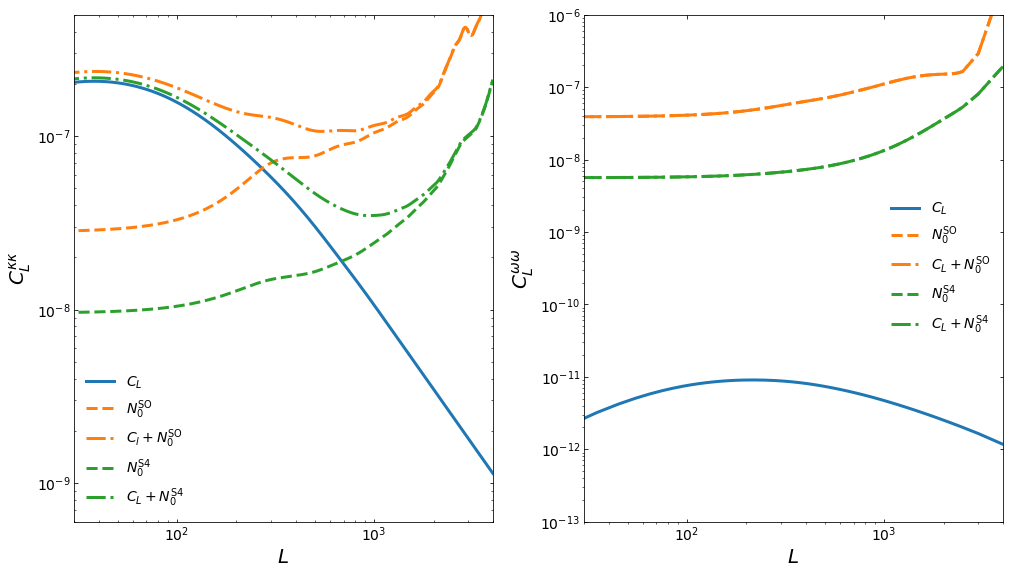

In [52]:
_noise = Noise()
ellmax = 4000
ells = np.arange(2, ellmax + 1, 1)
Cl_kk = power.get_kappa_ps(ells)
N0_file = "cache/_N0/N0_foreground_SO_all_base_qe_MV.npy"
_noise.setup_cmb_noise(N0_file, cmb_offset=2)
N_kk = _noise.get_N0("phi", ellmax=ellmax, tidy=True, ell_factors=False)
fig, ax = plt.subplots(1,2)
fig.tight_layout(pad=6)
ax[0].loglog(ells, Cl_kk, label="$C_L$", linewidth=3)
ax[0].loglog(ells,N_kk[ells], label="$N^{\mathrm{SO}}_0$", linestyle="--", linewidth=3)
ax[0].loglog(ells,Cl_kk + N_kk[ells], label="$C_l + N^{\mathrm{SO}}_0$",linestyle="dashdot", linewidth=3, color=u'#ff7f0e')


N0_file = "cache/_N0/N0_foreground_S4_all_MV.npy"
_noise.setup_cmb_noise(N0_file, cmb_offset=2)
N_kk = _noise.get_N0("phi", ellmax=ellmax, tidy=True, ell_factors=False)
ax[0].loglog(ells,N_kk[ells], label="$N^{\mathrm{S4}}_0$", linestyle="--", linewidth=3)
ax[0].loglog(ells,Cl_kk + N_kk[ells], label="$C_L + N^{\mathrm{S4}}_0$",linestyle="dashdot", linewidth=3, color=u'#2ca02c')
ax[0].set_ylabel("$C_{L}^{\kappa\kappa}$", fontsize=20)
ax[0].set_xlabel("$L$", fontsize=20)
ax[0].set_ylim(6e-10, 5e-7)
ax[0].set_xlim(30, 4e3)
# ax[0].set_title("CMB Convergence Power Spectrum")
ax[0].legend(prop={'size': 14}, frameon=False)
ax[0].tick_params(labelsize=14)
ax[0].tick_params(labelsize=14)
ax[0].tick_params(top=True, right=True, direction="in", which="both")


N0_file = "cache/_N0/N0_foreground_SO_all_base_qe_MV.npy"
_noise.setup_cmb_noise(N0_file, cmb_offset=2)
N_ww = _noise.get_N0("curl", ellmax=ellmax, tidy=True, ell_factors=False)
ax[1].loglog(omega_Ls, omega_ps, label="$C_{L}$", linewidth=3)
ax[1].loglog(omega_Ls,N_ww[omega_Ls], label="$N^{\mathrm{SO}}_0$", linestyle="--", linewidth=3)
ax[1].loglog(omega_Ls, omega_ps + N_ww[omega_Ls], label="$C_{L} + N^{\mathrm{SO}}_0$",linestyle="dashdot", linewidth=3, color=u'#ff7f0e')
N0_file = "cache/_N0/N0_foreground_S4_all_MV.npy"
_noise.setup_cmb_noise(N0_file, cmb_offset=2)
N_ww = _noise.get_N0("curl", ellmax=ellmax, tidy=True, ell_factors=False)
ax[1].loglog(omega_Ls, N_ww[omega_Ls], label="$N^{\mathrm{S4}}_0$",linestyle="--", linewidth=3)
ax[1].loglog(omega_Ls, omega_ps + N_ww[omega_Ls], label="$C_{L} + N^{\mathrm{S4}}_0$",linestyle="dashdot", linewidth=3, color=u'#2ca02c')

ax[1].legend(prop={'size': 14}, frameon=False)
# ax[1].set_title("CMB Curl Power Spectrum")
ax[1].set_ylabel("$C_{L}^{\omega\omega}$", fontsize=20)
ax[1].set_xlabel("$L$", fontsize=20)
ax[1].set_ylim(1e-13, 1e-6)
ax[1].set_xlim(30, 4e3)
ax[1].tick_params(labelsize=14)
ax[1].tick_params(top=True, right=True, direction="in")

fig.savefig("_report_plots/omega_kappa_ps.pdf", bbox_inches='tight')
plt.show()

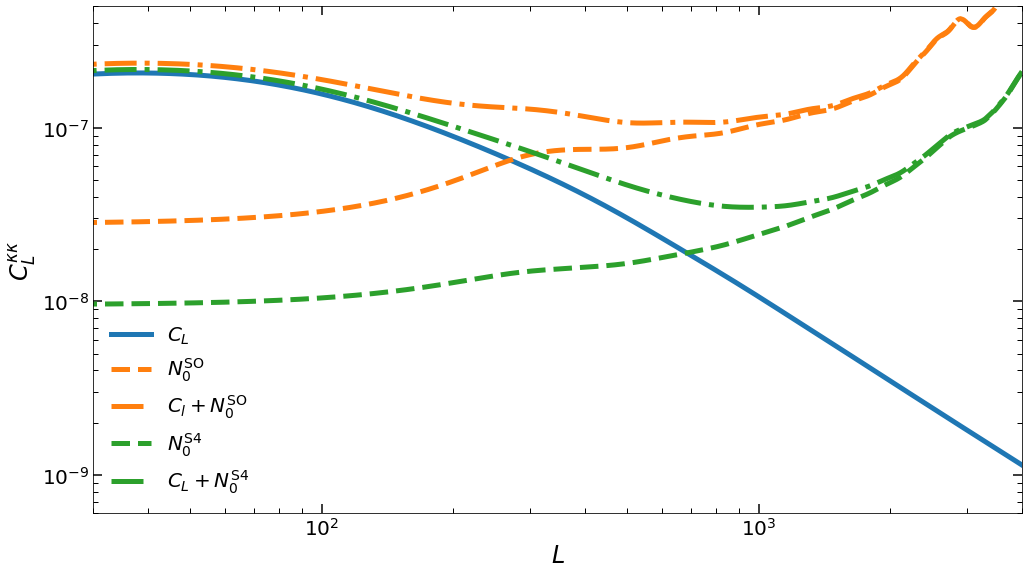

In [68]:
plt.rcParams['figure.figsize'] = [15, 9]
_noise = Noise()
ellmax = 4000
ells = np.arange(2, ellmax + 1, 1)
Cl_kk = power.get_kappa_ps(ells)
N0_file = "cache/_N0/N0_foreground_SO_all_base_qe_MV.npy"
_noise.setup_cmb_noise(N0_file, cmb_offset=2)
N_kk = _noise.get_N0("phi", ellmax=ellmax, tidy=True, ell_factors=False)
fig, ax = plt.subplots(1,1)
fig.tight_layout(pad=6)
ax.loglog(ells, Cl_kk, label="$C_L$", linewidth=5)
ax.loglog(ells,N_kk[ells], label="$N^{\mathrm{SO}}_0$", linestyle="--", linewidth=5)
ax.loglog(ells,Cl_kk + N_kk[ells], label="$C_l + N^{\mathrm{SO}}_0$",linestyle="dashdot", linewidth=5, color=u'#ff7f0e')


N0_file = "cache/_N0/N0_foreground_S4_all_MV.npy"
_noise.setup_cmb_noise(N0_file, cmb_offset=2)
N_kk = _noise.get_N0("phi", ellmax=ellmax, tidy=True, ell_factors=False)
ax.loglog(ells,N_kk[ells], label="$N^{\mathrm{S4}}_0$", linestyle="--", linewidth=5)
ax.loglog(ells,Cl_kk + N_kk[ells], label="$C_L + N^{\mathrm{S4}}_0$",linestyle="dashdot", linewidth=5, color=u'#2ca02c')
ax.set_ylabel("$C_{L}^{\kappa\kappa}$", fontsize=24)
ax.set_xlabel("$L$", fontsize=24)
ax.set_ylim(6e-10, 5e-7)
ax.set_xlim(30, 4e3)
# ax.set_title("CMB Convergence Power Spectrum")
ax.legend(prop={'size': 20}, frameon=False)
ax.tick_params(labelsize=14)
ax.tick_params(top=True, direction="in", right=True, which="minor", length=5, width=1)
ax.tick_params(top=True, direction="in", right=True, which="major", length=9, width=1.5)
ax.tick_params(labelsize=20)

# fig.savefig("_report_plots/kappa_ps.pdf", bbox_inches='tight')
plt.show()


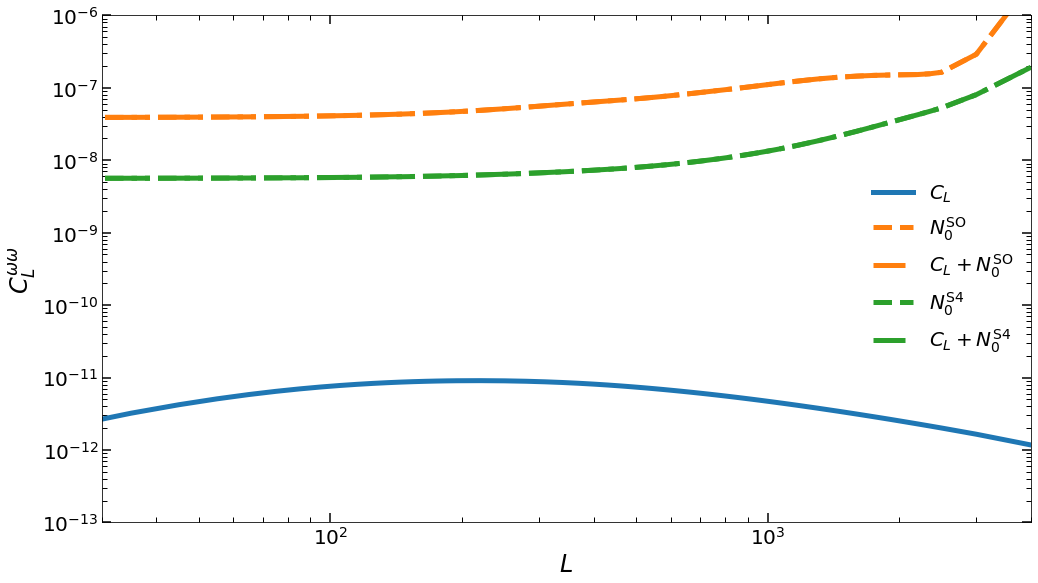

In [35]:
plt.rcParams['figure.figsize'] = [15, 9]
fig, ax = plt.subplots(1,1)
fig.tight_layout(pad=6)
N0_file = "cache/_N0/N0_foreground_SO_all_base_qe_MV.npy"
_noise.setup_cmb_noise(N0_file, cmb_offset=2)
N_ww = _noise.get_N0("curl", ellmax=ellmax, tidy=True, ell_factors=False)
ax.loglog(omega_Ls, omega_ps, label="$C_{L}$", linewidth=5)
ax.loglog(omega_Ls,N_ww[omega_Ls], label="$N^{\mathrm{SO}}_0$", linestyle="--", linewidth=5)
ax.loglog(omega_Ls, omega_ps + N_ww[omega_Ls], label="$C_{L} + N^{\mathrm{SO}}_0$",linestyle="dashdot", linewidth=5, color=u'#ff7f0e')
N0_file = "cache/_N0/N0_foreground_S4_all_MV.npy"
_noise.setup_cmb_noise(N0_file, cmb_offset=2)
N_ww = _noise.get_N0("curl", ellmax=ellmax, tidy=True, ell_factors=False)
ax.loglog(omega_Ls, N_ww[omega_Ls], label="$N^{\mathrm{S4}}_0$",linestyle="--", linewidth=5)
ax.loglog(omega_Ls, omega_ps + N_ww[omega_Ls], label="$C_{L} + N^{\mathrm{S4}}_0$",linestyle="dashdot", linewidth=5, color=u'#2ca02c')

ax.legend(prop={'size': 20}, frameon=False)
# ax[1].set_title("CMB Curl Power Spectrum")
ax.set_ylabel("$C_{L}^{\omega\omega}$", fontsize=24)
ax.set_xlabel("$L$", fontsize=24)
ax.set_ylim(1e-13, 1e-6)
ax.set_xlim(30, 4e3)
ax.tick_params(top=True, right=True, direction="in", which="minor", length=5, width=1)
ax.tick_params(top=True, right=True, direction="in", which="major", length=9, width=1.5)
ax.tick_params(labelsize=20)


fig.savefig("_report_plots/omega_ps.pdf", bbox_inches='tight')
plt.show()


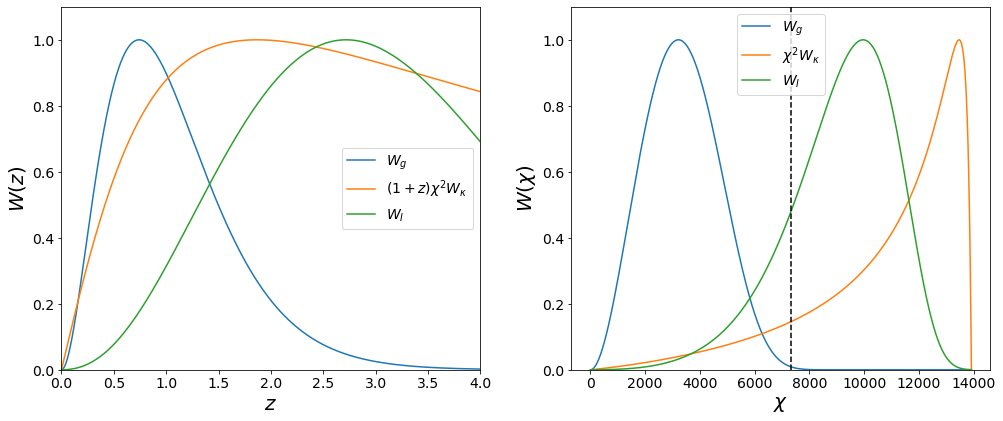

In [37]:
plt.rcParams['figure.figsize'] = [15, 7]
Chi_str = cosmo.get_chi_star()
ellmax = 4000
ells = np.arange(2, ellmax + 1, 1)
Chis = np.linspace(1, cosmo.z_to_Chi(10), 1000)
zs = cosmo.Chi_to_z(Chis)
gal_window_z = cosmo.gal_window_z(zs)
gal_window_Chi = cosmo.gal_window_Chi(Chis)
cmb_window_Chi = cosmo.cmb_lens_window(Chis, Chi_str)
cmb_window_z = (1+zs)*cmb_window_Chi/cosmo.get_hubble(zs)
nu = 353e9
cib_window_z = cosmo.cib_window_z(zs, nu)
cib_window_Chi = cosmo.cib_window_Chi(Chis, nu)
fig, ax = plt.subplots(1,2)
fig.tight_layout(pad=6)
ax[0].plot(zs, gal_window_z/np.max(gal_window_z), label="$W_g$")
ax[0].plot(zs, Chis**2*cmb_window_z/np.max(Chis**2*cmb_window_z), label="$(1+z)\chi^2W_{\kappa}$")
ax[0].plot(zs, cib_window_z/((np.max(cib_window_z))), label="$W_{I}$")
# ax[0].set_title("Normalised Window Functions")
ax[0].set_ylabel("$W(z)$", fontsize=20)
ax[0].set_xlabel("$z$", fontsize=20)
ax[0].set_xlim(0,4)
ax[0].set_ylim(0,1.1)
ax[0].legend(prop={'size': 14})
ax[0].tick_params(labelsize=14)


Chis = np.linspace(1, Chi_str, 1000)
zs = cosmo.Chi_to_z(Chis)
gal_window_Chi = cosmo.gal_window_Chi(Chis)
# cmb_window_Chi = cosmo.cmb_lens_window(Chis, Chi_str)/(1+zs)
# cmb_window_Chi = cosmo.cmb_lens_window(Chis, Chi_str)
cmb_window_Chi = (1+zs)*cosmo.cmb_lens_window(Chis, Chi_str)
# cmb_window_Chi = (1+(Chis))*cosmo.cmb_lens_window(Chis, Chi_str)
# cib_window_Chi = cosmo.cib_window_Chi(Chis, nu)
ax[1].plot(Chis, gal_window_Chi/np.max(gal_window_Chi), label="$W_g$")
ax[1].plot(Chis, Chis**2*cmb_window_Chi/np.max(Chis**2*cmb_window_Chi), label="$\chi^2W_{\kappa}$")
ax[1].plot(Chis, cib_window_Chi/np.max(cib_window_Chi), label="$W_{I}$")
ax[1].plot([7341,7341],[0,2], color='k', linestyle="--")
# ax[1].set_title("Normalised Window Functions")
ax[1].set_ylabel("$W(\chi)$", fontsize=20)
ax[1].set_xlabel("$\chi$", fontsize=20)
ax[1].set_ylim(0,1.1)
ax[1].legend(prop={'size': 14})
ax[1].tick_params(labelsize=14)
plt.show()

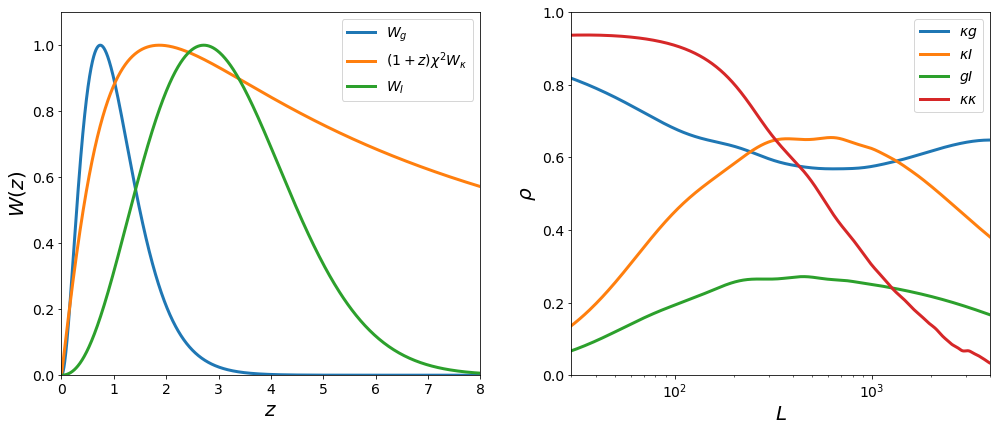

In [38]:
Chi_str = cosmo.get_chi_star()
ellmax = 4000
ells = np.arange(2, ellmax + 1, 1)
Chis = np.linspace(1, cosmo.z_to_Chi(10), 1000)
zs = cosmo.Chi_to_z(Chis)
gal_window_z = cosmo.gal_window_z(zs)
gal_window_Chi = cosmo.gal_window_Chi(Chis)
cmb_window_Chi = cosmo.cmb_lens_window(Chis, Chi_str)
cmb_window_z = (1+zs)*cmb_window_Chi/cosmo.get_hubble(zs)
nu = 353e9
cib_window_z = cosmo.cib_window_z(zs, nu)
cib_window_Chi = cosmo.cib_window_Chi(Chis, nu)
fig, ax = plt.subplots(1,2)
fig.tight_layout(pad=6)
ax[0].plot(zs, gal_window_z/np.max(gal_window_z), label="$W_g$", linewidth=3)
ax[0].plot(zs, Chis**2*cmb_window_z/np.max(Chis**2*cmb_window_z), label="$(1+z)\chi^2W_{\kappa}$", linewidth=3)
ax[0].plot(zs, cib_window_z/((np.max(cib_window_z))), label="$W_{I}$", linewidth=3)
# ax[0].set_title("Normalised Window Functions")
ax[0].set_ylabel("$W(z)$", fontsize=20)
ax[0].set_xlabel("$z$", fontsize=20)
ax[0].set_xlim(0,8)
ax[0].set_ylim(0,1.1)
ax[0].legend(prop={'size': 14})
ax[0].tick_params(labelsize=14)

N_g = _noise.get_gal_shot_N()
Cl_gg = power.get_gal_ps(ells)
Cl_gI = power.get_cib_gal_ps(ells)
Cl_gk = power.get_gal_kappa_ps(ells)
Cl_kk = power.get_kappa_ps(ells)
corr_gg = Cl_gk/(np.sqrt((Cl_gg + N_g[ells])*Cl_kk))
plt.semilogx(ells, corr_gg, label="$\kappa g$", linewidth=3)
nu = 353e9
N_cib = _noise.get_cib_shot_N(nu=nu)
N_dust = _noise.get_dust_N(nu)
Cl_Ik = power.get_cib_kappa_ps(ells, nu, Chi_str)
Cl_II = power.get_cib_ps(ells, nu)
corr_II = Cl_Ik/(np.sqrt((Cl_II+N_cib[ells]+N_dust[ells])*Cl_kk))
ax[1].semilogx(ells, corr_II, label=f"$\kappa I$", linewidth=3)
Cl_gI = power.get_cib_gal_ps(ells, nu=nu)
corr_gI = Cl_gI/(np.sqrt((Cl_gg + N_g[ells])*(Cl_II + N_cib[ells]+N_dust[ells])))
ax[1].semilogx(ells, corr_gI, label=f"$g I$", linewidth=3)
N0_file = "cache/_N0/N0_foreground_SO_all_base_qe_MV.npy"
_noise.setup_cmb_noise(N0_file, cmb_offset=2)
N_kk = _noise.get_N0("phi", ellmax=ellmax, tidy=True, ell_factors=False)
corr_kk = Cl_kk/(np.sqrt((Cl_kk + N_kk[ells])*Cl_kk))
ax[1].semilogx(ells, corr_kk, label=f"$\kappa\kappa$", linewidth=3)
ax[1].set_ylabel(r"$\rho$", fontsize=20)
ax[1].set_xlabel("$L$", fontsize=20)
ax[1].set_xlim(30,4000)
ax[1].set_ylim(0,1)
ax[1].legend(prop={'size': 14})
# ax[1].set_title("Cross Correlation Coeficient")
ax[1].tick_params(labelsize=14)

plt.show()

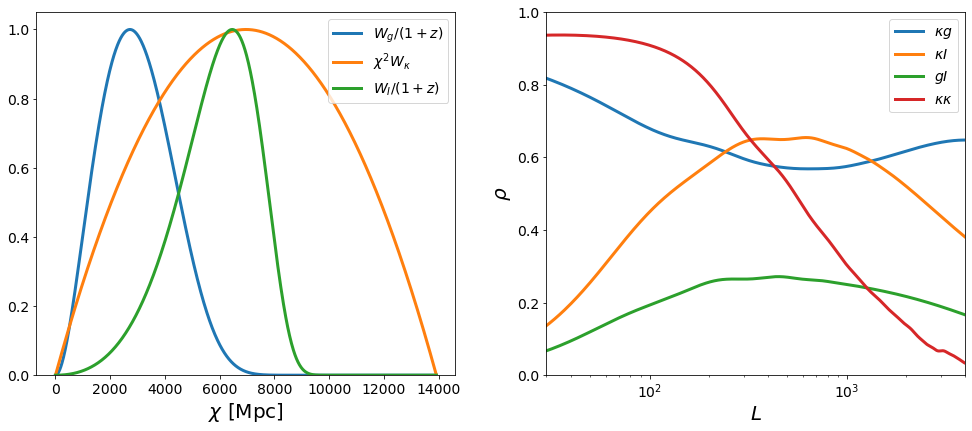

In [39]:
ellmax = 4000
ells = np.arange(2, ellmax + 1, 1)
fig, ax = plt.subplots(1,2)
fig.tight_layout(pad=6)
Chis = np.linspace(1, Chi_str, 1000)
zs = cosmo.Chi_to_z(Chis)
# print(zs)
gal_window_Chi = cosmo.gal_window_Chi(Chis)/(1+zs)
# cmb_window_Chi = cosmo.cmb_lens_window(Chis, Chi_str)/(1+zs)
# cmb_window_Chi = cosmo.cmb_lens_window(Chis, Chi_str)
cmb_window_Chi = cosmo.cmb_lens_window(Chis, Chi_str)
# cmb_window_Chi = (1+(Chis))*cosmo.cmb_lens_window(Chis, Chi_str)
cib_window_Chi = cosmo.cib_window_Chi(Chis, nu)/(1+zs)
ax[0].plot(Chis, gal_window_Chi/np.max(gal_window_Chi), label="$W_g/(1+z)$", linewidth=3)
ax[0].plot(Chis, Chis**2*cmb_window_Chi/np.max(Chis**2*cmb_window_Chi), label="$\chi^2W_{\kappa}$", linewidth=3)
ax[0].plot(Chis, cib_window_Chi/np.max(cib_window_Chi), label="$W_{I}/(1+z)$", linewidth=3)
# ax[1].plot([cosmo.z_to_Chi(8),cosmo.z_to_Chi(8)],[0,2], color='k', linestyle="--", linewidth=3)
# ax[1].set_title("Normalised Window Functions")
# ax[1].set_ylabel("$W(\chi)$", fontsize=20)
ax[0].set_xlabel("$\chi$ [Mpc]", fontsize=20)
ax[0].set_ylim(0,1.05)
ax[0].legend(prop={'size': 14})
ax[0].tick_params(labelsize=14)

N_g = _noise.get_gal_shot_N()
Cl_gg = power.get_gal_ps(ells)
Cl_gI = power.get_cib_gal_ps(ells)
Cl_gk = power.get_gal_kappa_ps(ells)
Cl_kk = power.get_kappa_ps(ells)
corr_gg = Cl_gk/(np.sqrt((Cl_gg + N_g[ells])*Cl_kk))
plt.semilogx(ells, corr_gg, label="$\kappa g$", linewidth=3)
nu = 353e9
N_cib = _noise.get_cib_shot_N(nu=nu)
N_dust = _noise.get_dust_N(nu)
Cl_Ik = power.get_cib_kappa_ps(ells, nu, Chi_str)
Cl_II = power.get_cib_ps(ells, nu)
corr_II = Cl_Ik/(np.sqrt((Cl_II+N_cib[ells]+N_dust[ells])*Cl_kk))
ax[1].semilogx(ells, corr_II, label=f"$\kappa I$", linewidth=3)
Cl_gI = power.get_cib_gal_ps(ells, nu=nu)
corr_gI = Cl_gI/(np.sqrt((Cl_gg + N_g[ells])*(Cl_II + N_cib[ells]+N_dust[ells])))
ax[1].semilogx(ells, corr_gI, label=f"$g I$", linewidth=3)
N0_file = "cache/_N0/N0_foreground_SO_all_base_qe_MV.npy"
_noise.setup_cmb_noise(N0_file, cmb_offset=2)
N_kk = _noise.get_N0("phi", ellmax=ellmax, tidy=True, ell_factors=False)
corr_kk = Cl_kk/(np.sqrt((Cl_kk + N_kk[ells])*Cl_kk))
ax[1].semilogx(ells, corr_kk, label=f"$\kappa\kappa$", linewidth=3)
ax[1].set_ylabel(r"$\rho$", fontsize=20)
ax[1].set_xlabel("$L$", fontsize=20)
ax[1].set_xlim(30,4000)
ax[1].set_ylim(0,1)
ax[1].legend(prop={'size': 14})
# ax[1].set_title("Cross Correlation Coeficient")
ax[1].tick_params(labelsize=14)

fig.savefig("_report_plots/windows_corr.pdf", bbox_inches='tight')
plt.show()

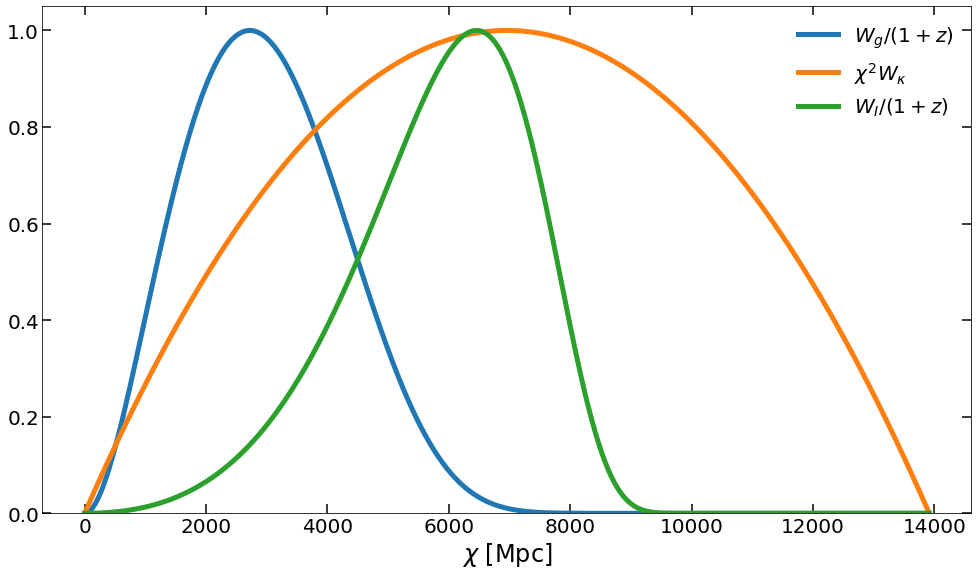

In [40]:
plt.rcParams['figure.figsize'] = [15, 9]
ellmax = 4000
ells = np.arange(2, ellmax + 1, 1)
fig, ax = plt.subplots(1,1)
fig.tight_layout(pad=6)
Chis = np.linspace(1, Chi_str, 1000)
zs = cosmo.Chi_to_z(Chis)
# print(zs)
gal_window_Chi = cosmo.gal_window_Chi(Chis)/(1+zs)
# cmb_window_Chi = cosmo.cmb_lens_window(Chis, Chi_str)/(1+zs)
# cmb_window_Chi = cosmo.cmb_lens_window(Chis, Chi_str)
cmb_window_Chi = cosmo.cmb_lens_window(Chis, Chi_str)
# cmb_window_Chi = (1+(Chis))*cosmo.cmb_lens_window(Chis, Chi_str)
cib_window_Chi = cosmo.cib_window_Chi(Chis, nu)/(1+zs)
ax.plot(Chis, gal_window_Chi/np.max(gal_window_Chi), label="$W_g/(1+z)$", linewidth=5)
ax.plot(Chis, Chis**2*cmb_window_Chi/np.max(Chis**2*cmb_window_Chi), label="$\chi^2W_{\kappa}$", linewidth=5)
ax.plot(Chis, cib_window_Chi/np.max(cib_window_Chi), label="$W_{I}/(1+z)$", linewidth=5)
# ax[1].plot([cosmo.z_to_Chi(8),cosmo.z_to_Chi(8)],[0,2], color='k', linestyle="--", linewidth=3)
# ax[1].set_title("Normalised Window Functions")
# ax[1].set_ylabel("$W(\chi)$", fontsize=20)
ax.set_xlabel("$\chi$ [Mpc]", fontsize=24)
ax.set_ylim(0,1.05)
ax.legend(prop={'size': 20}, frameon=False)
ax.tick_params(top=True, right=True, direction="in", which="minor", length=5, width=1)
ax.tick_params(top=True, right=True, direction="in", which="major", length=9, width=1.5)
ax.tick_params(labelsize=20)
fig.savefig("_report_plots/windows.pdf", bbox_inches='tight')
plt.show()


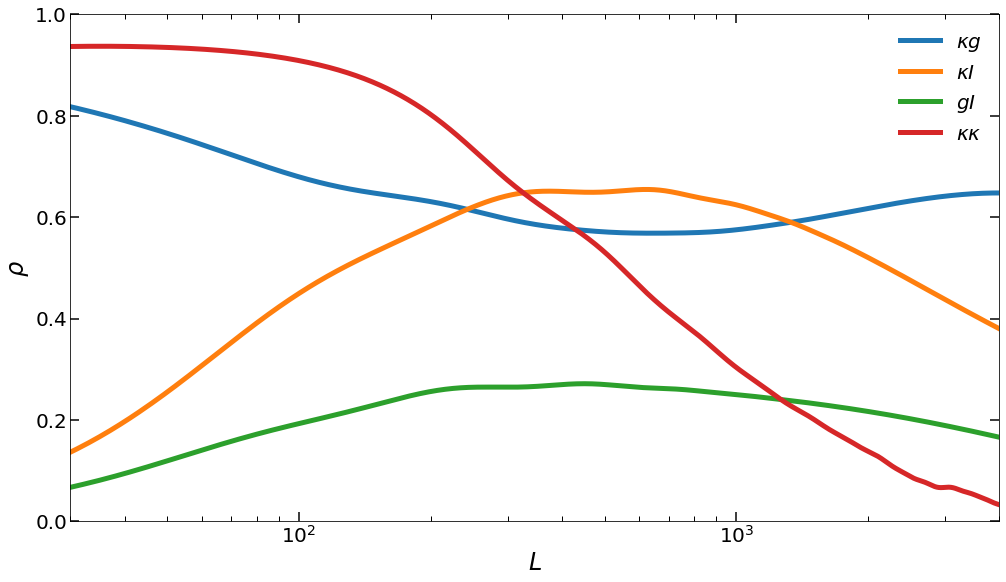

In [41]:
plt.rcParams['figure.figsize'] = [15, 9]
fig, ax = plt.subplots(1,1)
fig.tight_layout(pad=6)
N_g = _noise.get_gal_shot_N()
Cl_gg = power.get_gal_ps(ells)
Cl_gI = power.get_cib_gal_ps(ells)
Cl_gk = power.get_gal_kappa_ps(ells)
Cl_kk = power.get_kappa_ps(ells)
corr_gg = Cl_gk/(np.sqrt((Cl_gg + N_g[ells])*Cl_kk))
plt.semilogx(ells, corr_gg, label="$\kappa g$", linewidth=5)
nu = 353e9
N_cib = _noise.get_cib_shot_N(nu=nu)
N_dust = _noise.get_dust_N(nu)
Cl_Ik = power.get_cib_kappa_ps(ells, nu, Chi_str)
Cl_II = power.get_cib_ps(ells, nu)
corr_II = Cl_Ik/(np.sqrt((Cl_II+N_cib[ells]+N_dust[ells])*Cl_kk))
ax.semilogx(ells, corr_II, label=f"$\kappa I$", linewidth=5)
Cl_gI = power.get_cib_gal_ps(ells, nu=nu)
corr_gI = Cl_gI/(np.sqrt((Cl_gg + N_g[ells])*(Cl_II + N_cib[ells]+N_dust[ells])))
ax.semilogx(ells, corr_gI, label=f"$g I$", linewidth=5)
N0_file = "cache/_N0/N0_foreground_SO_all_base_qe_MV.npy"
_noise.setup_cmb_noise(N0_file, cmb_offset=2)
N_kk = _noise.get_N0("phi", ellmax=ellmax, tidy=True, ell_factors=False)
corr_kk = Cl_kk/(np.sqrt((Cl_kk + N_kk[ells])*Cl_kk))
ax.semilogx(ells, corr_kk, label=f"$\kappa\kappa$", linewidth=5)
ax.set_ylabel(r"$\rho$", fontsize=24)
ax.set_xlabel("$L$", fontsize=24)
ax.set_xlim(30,4000)
ax.set_ylim(0,1)
ax.legend(prop={'size': 20}, frameon=False)
# ax[1].set_title("Cross Correlation Coeficient")
ax.tick_params(top=True, right=True, direction="in", which="minor", length=5, width=1)
ax.tick_params(top=True, right=True, direction="in", which="major", length=9, width=1.5)
ax.tick_params(labelsize=20)
fig.savefig("_report_plots/corr.pdf", bbox_inches='tight')
plt.show()

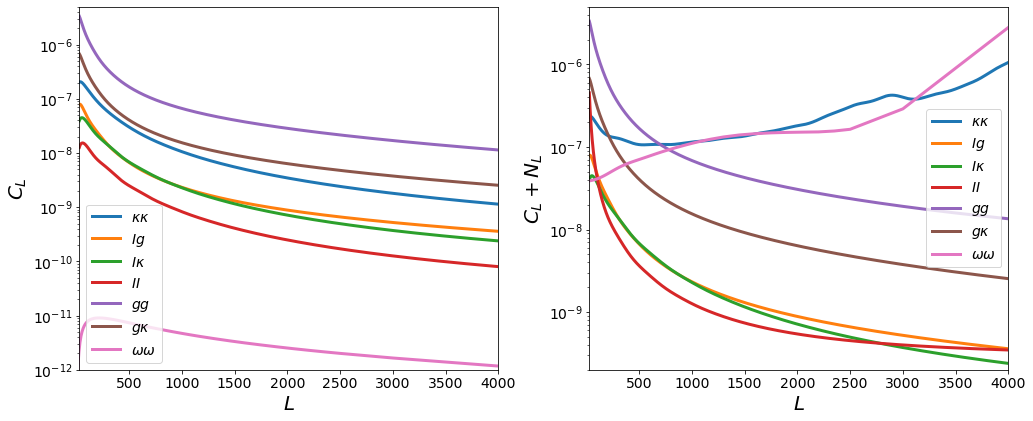

In [42]:
plt.rcParams['figure.figsize'] = [15, 7]
Chi_str = cosmo.get_chi_star()
ellmax = 4000
nu = 353e9
ells = np.arange(2, ellmax + 1, 1)
fig, ax = plt.subplots(1,2)
fig.tight_layout(pad=6)
Cl_kk = power.get_kappa_ps(ells)
_noise=Noise()
N0_file = "cache/_N0/N0_foreground_SO_all_base_qe_MV.npy"
_noise.setup_cmb_noise(N0_file, cmb_offset=2)
N_kk = _noise.get_N0("phi", ellmax=ellmax, tidy=True, ell_factors=False)[ells]
N_ww = _noise.get_N0("curl", ellmax=ellmax, tidy=True, ell_factors=False)
Cl_gg = power.get_gal_ps(ells)
N_gg = _noise.get_gal_shot_N(ellmax=ellmax)[ells]
Cl_II = power.get_cib_ps(ells, nu)
N_II = _noise.get_cib_shot_N(nu, ellmax=ellmax)[ells]
N_dust = _noise.get_dust_N(nu, ellmax=ellmax)[ells]
Cl_Ig = power.get_cib_gal_ps(ells, nu)
Cl_Ik = power.get_cib_kappa_ps(ells, nu, Chi_str)
ax[0].semilogy(ells, Cl_kk, label="$\kappa\kappa$", linewidth=3)
ax[0].semilogy(ells, Cl_Ig, label=f"$Ig$", linewidth=3)
ax[0].semilogy(ells, Cl_Ik, label=f"$I\kappa$", linewidth=3)
ax[0].semilogy(ells, Cl_II, label=f"$II$", linewidth=3)
ax[0].semilogy(ells, Cl_gg, label=f"$gg$", linewidth=3)
ax[0].semilogy(ells, Cl_gk, label="$g\kappa$", linewidth=3)
ax[0].semilogy(omega_Ls, omega_ps, label="$\omega\omega$", linewidth=3)
ax[0].set_xlim(30,4000)
ax[0].set_ylim(1e-12, 5e-6)
ax[0].set_ylabel("$C_{L}$", fontsize=20)
ax[0].set_xlabel("$L$", fontsize=20)
# ax[0].title("Power Spectra + Noise")
ax[0].legend(prop={'size': 14})
ax[0].tick_params(labelsize=14)

ax[1].semilogy(ells, Cl_kk+N_kk, label="$\kappa\kappa$", linewidth=3)
ax[1].semilogy(ells, Cl_Ig, label=f"$Ig$", linewidth=3)
ax[1].semilogy(ells, Cl_Ik, label=f"$I\kappa$", linewidth=3)
ax[1].semilogy(ells, Cl_II+N_II+N_dust, label=f"$II$", linewidth=3)
ax[1].semilogy(ells, Cl_gg+N_gg, label=f"$gg$", linewidth=3)
ax[1].semilogy(ells, Cl_gk, label="$g\kappa$", linewidth=3)
ax[1].semilogy(omega_Ls, omega_ps + N_ww[omega_Ls], label="$\omega\omega$", linewidth=3)
ax[1].set_xlim(30,4000)
ax[1].set_ylim(2e-10, 5e-6)
ax[1].set_ylabel("$C_{L}+N_L$", fontsize=20)
ax[1].set_xlabel("$L$", fontsize=20)
# ax[0].title("Power Spectra + Noise")
ax[1].legend(prop={'size': 14})
ax[1].tick_params(labelsize=14)
plt.show()

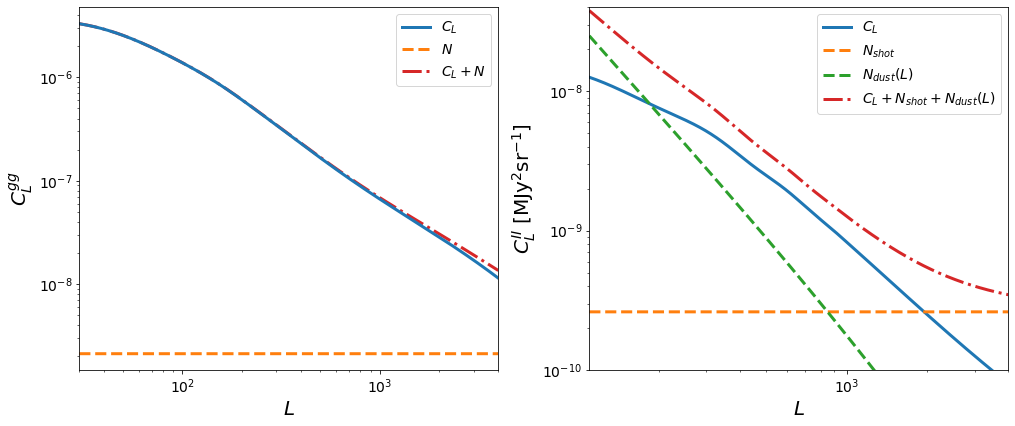

In [43]:
ellmax = 4000
ells = np.arange(30, ellmax + 1, 1)
Cl_gg = power.get_gal_ps(ells)
N_gg = _noise.get_gal_shot_N(ellmax=ellmax)
fig, ax = plt.subplots(1,2)
fig.tight_layout(pad=6)
ax[0].loglog(ells, Cl_gg, label="$C_L$", linewidth=3)
ax[0].loglog(ells,N_gg[ells], label="$N$", linestyle="--", linewidth=3)
ax[0].loglog([-1],[-1])
ax[0].loglog(ells,Cl_gg+N_gg[ells], label="$C_L + N$", linestyle="dashdot", linewidth=3, color=u'#d62728',zorder=0)
ax[0].set_ylabel("$C_{L}^{gg}$", fontsize=20)
ax[0].set_xlabel("$L$", fontsize=20)
# ax[0].set_title("Galaxy Power Spectrum")
ax[0].set_xlim(30,4000)
ax[0].legend(prop={'size': 14})
ax[0].tick_params(labelsize=14)


ells = np.arange(110, ellmax + 1, 1)
Cl_II = power.get_cib_ps(ells, nu=353e9)
N_II = _noise.get_cib_shot_N(nu=353e9, ellmax=ellmax)
N_dust = _noise.get_dust_N(nu=353e9, ellmax=ellmax)
ax[1].loglog(ells, Cl_II, label="$C_L$", linewidth=3)
ax[1].loglog(ells, N_II[ells], label="$N_{shot}$", linestyle="--", linewidth=3)
ax[1].loglog(ells, N_dust[ells], label="$N_{dust}(L)$", linestyle="--", linewidth=3)
ax[1].loglog(ells, (Cl_II + N_II[ells] + N_dust[ells]), label="$C_L + N_{shot} + N_{dust}(L)$",linestyle="dashdot", linewidth=3)
ax[1].set_ylabel("$C_{L}^{II}$ [MJy$^2$sr$^{-1}$]", fontsize=20)
ax[1].set_xlabel("$L$", fontsize=20)
# ax[1].set_title("353 CIB Power Spectrum")
ax[1].set_xlim(110, 4000)
ax[1].set_ylim(1e-10,4e-8)
ax[1].legend(prop={'size': 14})
ax[1].tick_params(labelsize=14)

fig.savefig("_report_plots/gal_cib_ps.pdf", bbox_inches='tight')
plt.show()

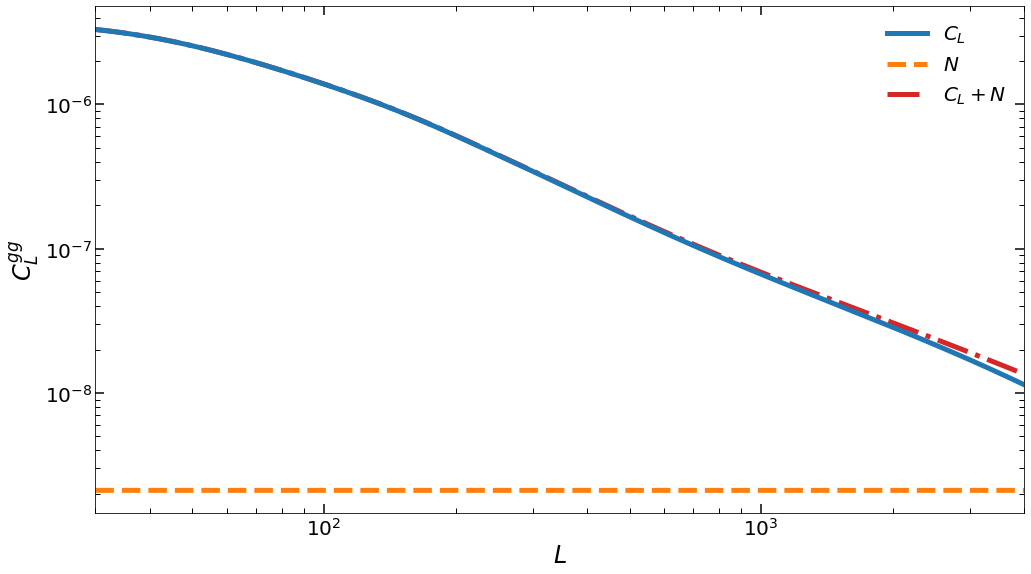

In [44]:
plt.rcParams['figure.figsize'] = [15, 9]
ellmax = 4000
ells = np.arange(30, ellmax + 1, 1)
Cl_gg = power.get_gal_ps(ells)
N_gg = _noise.get_gal_shot_N(ellmax=ellmax)
fig, ax = plt.subplots(1,1)
fig.tight_layout(pad=6)
ax.loglog(ells, Cl_gg, label="$C_L$", linewidth=5)
ax.loglog(ells,N_gg[ells], label="$N$", linestyle="--", linewidth=5)
ax.loglog([-1],[-1])
ax.loglog(ells,Cl_gg+N_gg[ells], label="$C_L + N$", linestyle="dashdot", linewidth=5, color=u'#d62728',zorder=0)
ax.set_ylabel("$C_{L}^{gg}$", fontsize=24)
ax.set_xlabel("$L$", fontsize=24)
# ax[0].set_title("Galaxy Power Spectrum")
ax.set_xlim(30,4000)
ax.legend(prop={'size': 20}, frameon=False)
ax.tick_params(top=True, right=True, direction="in", which="minor", length=5, width=1)
ax.tick_params(top=True, right=True, direction="in", which="major", length=9, width=1.5)
ax.tick_params(labelsize=20)
fig.savefig("_report_plots/gal_ps.pdf", bbox_inches='tight')
plt.show()

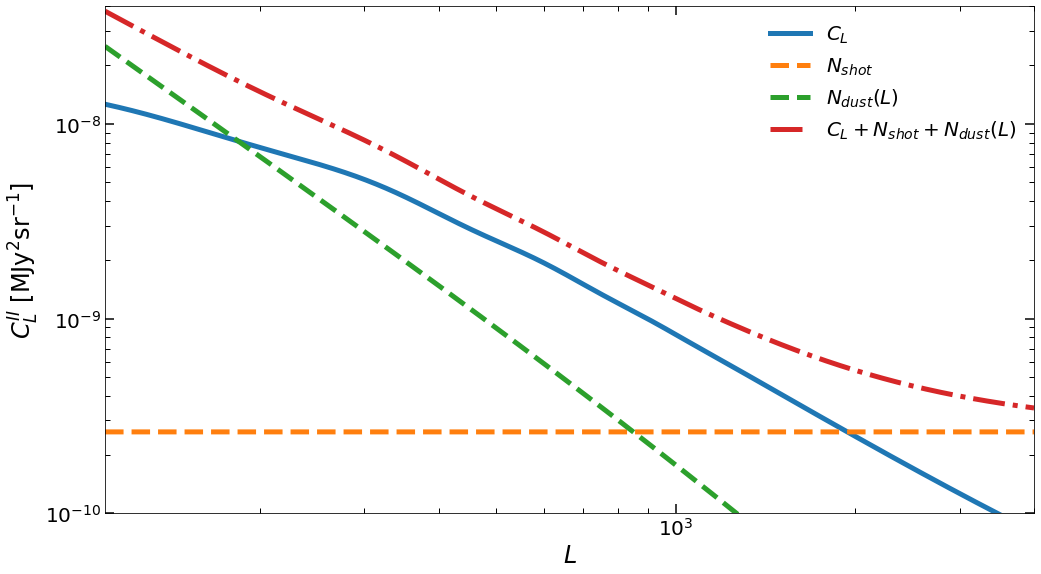

In [45]:
plt.rcParams['figure.figsize'] = [15, 9]
fig, ax = plt.subplots(1,1)
fig.tight_layout(pad=6)
ells = np.arange(110, ellmax + 1, 1)
Cl_II = power.get_cib_ps(ells, nu=353e9)
N_II = _noise.get_cib_shot_N(nu=353e9, ellmax=ellmax)
N_dust = _noise.get_dust_N(nu=353e9, ellmax=ellmax)
ax.loglog(ells, Cl_II, label="$C_L$", linewidth=5)
ax.loglog(ells, N_II[ells], label="$N_{shot}$", linestyle="--", linewidth=5)
ax.loglog(ells, N_dust[ells], label="$N_{dust}(L)$", linestyle="--", linewidth=5)
ax.loglog(ells, (Cl_II + N_II[ells] + N_dust[ells]), label="$C_L + N_{shot} + N_{dust}(L)$",linestyle="dashdot", linewidth=5)
ax.set_ylabel("$C_{L}^{II}$ [MJy$^2$sr$^{-1}$]", fontsize=24)
ax.set_xlabel("$L$", fontsize=24)
# ax[1].set_title("353 CIB Power Spectrum")
ax.set_xlim(110, 4000)
ax.set_ylim(1e-10,4e-8)
ax.legend(prop={'size': 20}, frameon=False)
ax.tick_params(top=True, right=True, direction="in", which="minor", length=5, width=1)
ax.tick_params(top=True, right=True, direction="in", which="major", length=9, width=1.5)
ax.tick_params(labelsize=20)
fig.savefig("_report_plots/cib_ps.pdf", bbox_inches='tight')
plt.show()

Time = 136.1944441795349


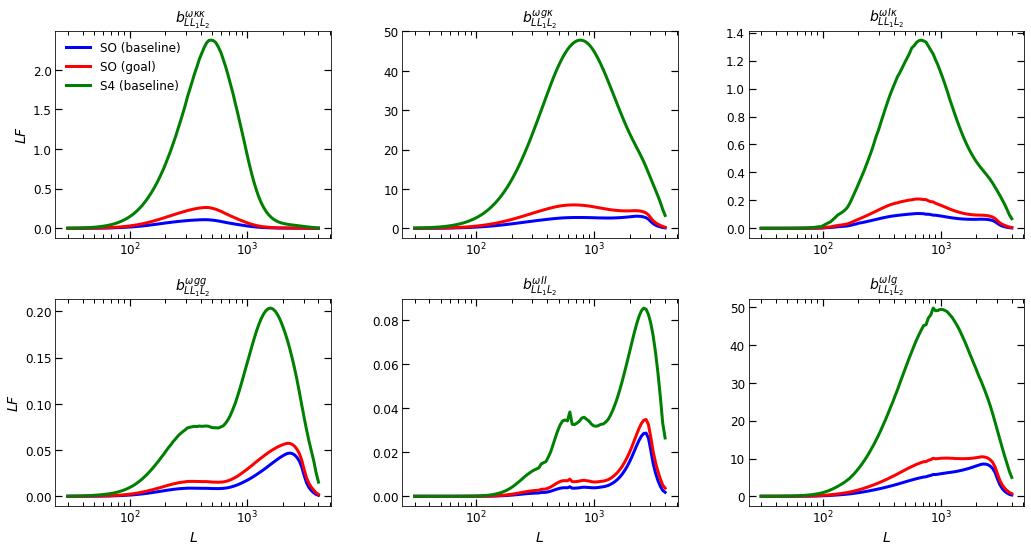

In [51]:
import time
plt.rc('figure', facecolor='w')
Ls1 = np.arange(30,40,2)
Ls2 = np.logspace(1, 3, 100)*4
Ls = np.concatenate((Ls1,Ls2))
Ntheta=100
t0 = time.time()
label_typs = ["$b^{\omega\kappa\kappa}_{LL_1L_2}$", "$b^{\omega gg}_{LL_1L_2}$", "$b^{\omega g\kappa}_{LL_1L_2}$", "$b^{\omega II}_{LL_1L_2}$", "$b^{\omega I\kappa}_{LL_1L_2}$", "$b^{\omega Ig}_{LL_1L_2}$"]
typs = ["kkw", "ggw", "gkw", "IIw", "Ikw", "Igw"]
fig, ax = plt.subplots(2,3, figsize=[15, 8])
fig.tight_layout(pad=4)
N0_files = ["cache/_N0/N0_foreground_SO_all_base_qe_MV.npy", "cache/_N0/N0_foreground_SO_all_goal_it_MV.npy", "cache/_N0/N0_foreground_S4_all_MV.npy"]
labels = ["SO (baseline)", "SO (goal)", "S4 (baseline)"]
colours = ["blue", "red", "green"]
offsets = [2, 2, 2]
bools = [False, False, False]
for iii, N0_file in enumerate(N0_files):
    fisher.reset_noise(N0_file, offsets[iii], bools[iii])
    for jjj, typ in enumerate(typs):
        F_conv_rot = fisher.get_bispectrum_Fisher(typ, Ls=Ls, Ntheta=Ntheta, f_sky=0.4, arr=True)
        col = jjj//2
        if jjj % 2: row = 1
        else: row = 0
        ax[row][col].semilogx(Ls, Ls*F_conv_rot, label=f"{labels[iii]}", color=colours[iii], linewidth=3)
        ax[row][col].set_title(f"{label_typs[jjj]}", fontsize=14)
        ax[row][col].tick_params(top=True, right=True, direction="in", which="minor", length=4, width=1)
        ax[row][col].tick_params(top=True, right=True, direction="in", which="major", length=7, width=1.2)
        ax[row][col].tick_params(labelsize=12)
        if row==0 and col==0:
            ax[row][col].legend(prop={'size': 12}, frameon=False)
        if row == 1:
            ax[row][col].set_xlabel("$L$", fontsize=14)
        if col == 0:
            ax[row][col].set_ylabel("$LF$", fontsize=14)
t1 = time.time()
print(f"Time = {t1 - t0}")

fig.savefig("_report_plots/bi_fish_.pdf", bbox_inches='tight')
plt.show()

In [69]:
from cosmology import Cosmology
from scipy.interpolate import InterpolatedUnivariateSpline
cosmo = Cosmology()
omega_Ls, omega_ps = cosmo.get_postborn_omega_ps(8000)
omega_ps_spline = InterpolatedUnivariateSpline(omega_Ls, omega_ps)

Matrix([[kk, kg], [gk, gg]])
Matrix([[kk, ky], [yk, yy]])
Matrix([[gg, gy], [yg, yy]])
Matrix([[kk, kg, ky], [gk, gg, gy], [yk, yg, yy]])
Matrix([[kk, kg, ky], [gk, gg, gy], [yk, yg, yy]])
Matrix([[kk, kg, ky], [gk, gg, gy], [yk, yg, yy]])
Matrix([[kk, kg, ky], [gk, gg, gy], [yk, yg, yy]])


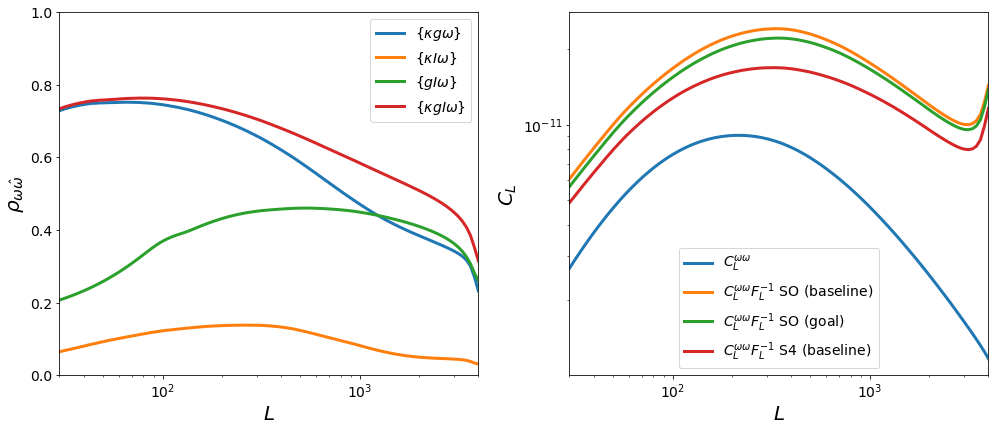

Time = 36528.777636766434


In [70]:
plt.rcParams['figure.figsize'] = [15, 7]
t0 = time.time()
N0_file = "cache/_N0/N0_my_SO_14_14_TQU.npy"
fisher.reset_noise(N0_file)
typs = ["kg", "kI", "gI", "kgI"]
label_typs = ["$\{\kappa g\omega\}$", "$\{\kappa I\omega\}$", "$\{gI\omega\}$", "$\{\kappa gI\omega\}$"]
Ls1 = np.arange(30,40,2)
Ls2 = np.logspace(1, 3, 100)*4
Ls = np.concatenate((Ls1,Ls2))
fig, ax = plt.subplots(1,2)
fig.tight_layout(pad=6)
for iii, typ in enumerate(typs):
    Ls, F_L = fisher.get_F_L(typ, Ls=Ls, Ntheta=100, nu=353e9)
    ax[0].semilogx(Ls, np.sqrt(F_L), label=label_typs[iii], linewidth=3)
ax[0].set_ylabel(r'$\rho_{\omega\hat{\omega}}$', fontsize=20)
ax[0].set_xlabel("$L$", fontsize=20)
ax[0].set_xlim(30,4000)
ax[0].set_ylim(0,1)
ax[0].legend(prop={'size': 14})
ax[0].tick_params(labelsize=14)



N0_files = ["cache/_N0/N0_foreground_SO_all_base_qe_MV.npy", "cache/_N0/N0_foreground_SO_all_goal_it_MV.npy", "cache/_N0/N0_foreground_S4_all_MV.npy"]
labels = ["SO (baseline)", "SO (goal)", "S4 (baseline)"]
ax[1].loglog(Ls, omega_ps_spline(Ls), label="$C^{\omega\omega}_L$", linewidth=3)
for iii, N0_file in enumerate(N0_files):
    fisher.reset_noise(N0_file, 2, False)
    Ls, F_L = fisher.get_F_L("kgI", Ls=Ls, Ntheta=100, nu=353e9)
    ax[1].loglog(Ls, omega_ps_spline(Ls)/F_L, label="$C^{\omega\omega}_LF_L^{-1}$ "+labels[iii], linewidth=3)
ax[1].set_ylabel("$C_{L}$", fontsize=20)
ax[1].set_xlabel("$L$", fontsize=20)
ax[1].set_xlim(30,4000)
ax[1].legend(prop={'size': 14})
ax[1].tick_params(labelsize=14)

plt.show()
t1 = time.time()
print(f"Time = {t1 - t0}")

In [71]:
N0_file = "cache/_N0/N0_foreground_SO_all_base_qe_MV.npy"
fisher.reset_noise(N0_file, 2, False)
typs = ["kg", "kI", "gI", "kgI"]
label_typs = ["$\{\kappa g\omega\}$", "$\{\kappa I\omega\}$", "$\{gI\omega\}$", "$\{\kappa gI\omega\}$"]
Ls1 = np.arange(30,40,2)
Ls2 = np.logspace(1, 3, 100)*4
Ls = np.concatenate((Ls1,Ls2))
Ls, F_L_kg = fisher.get_F_L("kg", Ls=Ls, Ntheta=100, nu=353e9)
Ls, F_L_kI = fisher.get_F_L("kI", Ls=Ls, Ntheta=100, nu=353e9)
Ls, F_L_gI = fisher.get_F_L("gI", Ls=Ls, Ntheta=100, nu=353e9)
Ls, F_L_kgI = fisher.get_F_L("kgI", Ls=Ls, Ntheta=100, nu=353e9)

Matrix([[kk, kg], [gk, gg]])
Matrix([[kk, ky], [yk, yy]])
Matrix([[gg, gy], [yg, yy]])
Matrix([[kk, kg, ky], [gk, gg, gy], [yk, yg, yy]])


In [72]:
F_L_kgI_base = F_L_kgI
N0_file = "cache/_N0/N0_foreground_SO_all_goal_it_MV.npy"
fisher.reset_noise(N0_file, 2, False)
Ls, F_L_kgI_goal = fisher.get_F_L("kgI", Ls=Ls, Ntheta=100, nu=353e9)
N0_file = "cache/_N0/N0_foreground_S4_all_MV.npy"
fisher.reset_noise(N0_file, 2, False)
Ls, F_L_kgI_S4 = fisher.get_F_L("kgI", Ls=Ls, Ntheta=100, nu=353e9)

Matrix([[kk, kg, ky], [gk, gg, gy], [yk, yg, yy]])
Matrix([[kk, kg, ky], [gk, gg, gy], [yk, yg, yy]])


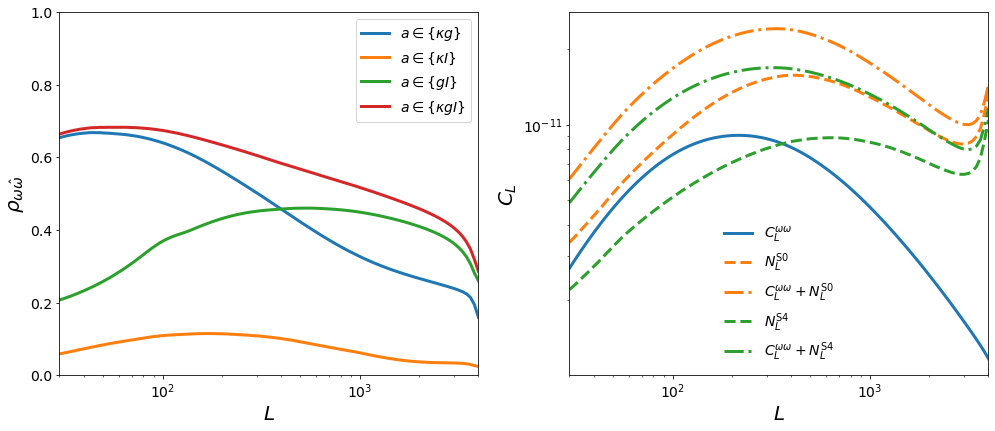

Time = 3.6529338359832764


In [73]:
plt.rcParams['figure.figsize'] = [15, 7]
t0 = time.time()
N0_file = "cache/_N0/N0_my_SO_14_14_TQU.npy"
fisher.reset_noise(N0_file)
typs = ["kg", "kI", "gI", "kgI"]
label_typs = ["$a\in\{\kappa g\}$", "$a\in\{\kappa I\}$", "$a\in\{gI\}$", "$a\in\{\kappa gI\}$"]
Ls1 = np.arange(30,40,2)
Ls2 = np.logspace(1, 3, 100)*4
Ls = np.concatenate((Ls1,Ls2))
fig, ax = plt.subplots(1,2)
fig.tight_layout(pad=6)
ax[0].semilogx(Ls, np.sqrt(F_L_kg), label=label_typs[0], linewidth=3)
ax[0].semilogx(Ls, np.sqrt(F_L_kI), label=label_typs[1], linewidth=3)
ax[0].semilogx(Ls, np.sqrt(F_L_gI), label=label_typs[2], linewidth=3)
ax[0].semilogx(Ls, np.sqrt(F_L_kgI), label=label_typs[3], linewidth=3)
ax[0].set_ylabel(r'$\rho_{\omega\hat{\omega}}$', fontsize=20)
ax[0].set_xlabel("$L$", fontsize=20)
ax[0].set_xlim(30,4000)
ax[0].set_ylim(0,1)
ax[0].legend(prop={'size': 14})
ax[0].tick_params(labelsize=14)



N0_files = ["cache/_N0/N0_foreground_SO_all_base_qe_MV.npy", "cache/_N0/N0_foreground_SO_all_goal_it_MV.npy", "cache/_N0/N0_foreground_S4_all_MV.npy"]
labels = ["SO (baseline)", "SO (goal)", "S4 (baseline)"]
ax[1].loglog(Ls, omega_ps_spline(Ls), label="$C^{\omega\omega}_L$", linewidth=3)
ax[1].loglog(Ls, omega_ps_spline(Ls)/F_L_kgI_base - omega_ps_spline(Ls), label="$N_L^{\mathrm{S0}}$", linewidth=3, linestyle="--")
ax[1].loglog(Ls, omega_ps_spline(Ls)/F_L_kgI_base, label="$C^{\omega\omega}_L+N_L^{\mathrm{S0}}$", linewidth=3, linestyle="dashdot", color=u'#ff7f0e')
# ax[1].loglog(Ls, omega_ps_spline(Ls)/F_L_kgI_goal, label="$C^{\omega\omega}_LF_L^{-1}$ "+labels[1], linewidth=3)
ax[1].loglog(Ls, omega_ps_spline(Ls)/F_L_kgI_S4 - omega_ps_spline(Ls), label="$N_L^{\mathrm{S4}}$", linewidth=3, linestyle="--")
ax[1].loglog(Ls, omega_ps_spline(Ls)/F_L_kgI_S4, label="$C^{\omega\omega}_L+N_L^{\mathrm{S4}}$", linewidth=3, linestyle="dashdot",color=u'#2ca02c')
ax[1].set_ylabel("$C_{L}$", fontsize=20)
ax[1].set_xlabel("$L$", fontsize=20)
ax[1].set_xlim(30,4000)
ax[1].legend(prop={'size': 20}, frameon=False)

plt.show()
t1 = time.time()
# fig.savefig("_report_plots/omega_lss_ps.pdf", bbox_inches='tight')
print(f"Time = {t1 - t0}")

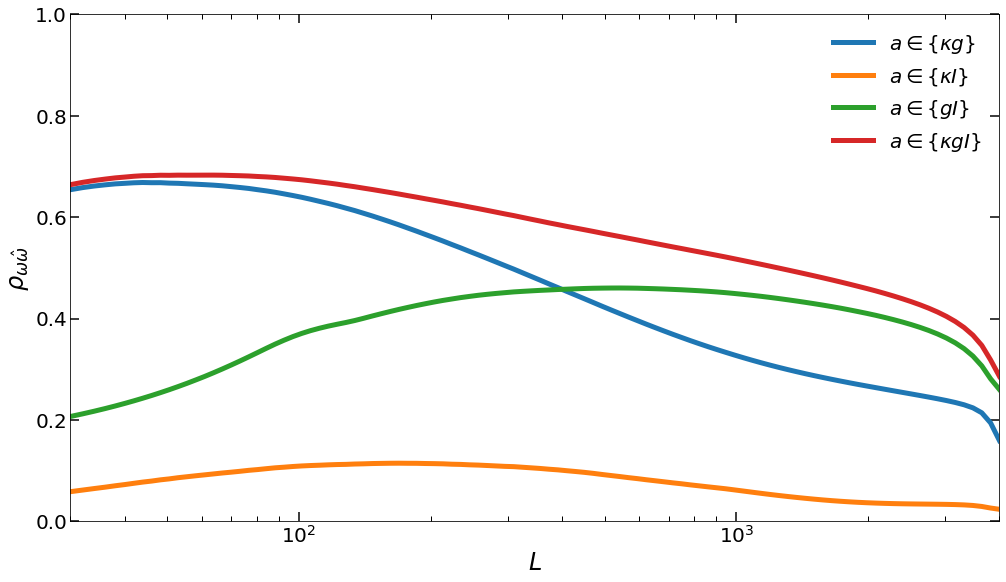

In [77]:
plt.rcParams['figure.figsize'] = [15, 9]
t0 = time.time()
N0_file = "cache/_N0/N0_my_SO_14_14_TQU.npy"
fisher.reset_noise(N0_file)
typs = ["kg", "kI", "gI", "kgI"]
label_typs = ["$a\in\{\kappa g\}$", "$a\in\{\kappa I\}$", "$a\in\{gI\}$", "$a\in\{\kappa gI\}$"]
Ls1 = np.arange(30,40,2)
Ls2 = np.logspace(1, 3, 100)*4
Ls = np.concatenate((Ls1,Ls2))
fig, ax = plt.subplots(1,1)
fig.tight_layout(pad=6)
ax.semilogx(Ls, np.sqrt(F_L_kg), label=label_typs[0], linewidth=5)
ax.semilogx(Ls, np.sqrt(F_L_kI), label=label_typs[1], linewidth=5)
ax.semilogx(Ls, np.sqrt(F_L_gI), label=label_typs[2], linewidth=5)
ax.semilogx(Ls, np.sqrt(F_L_kgI), label=label_typs[3], linewidth=5)
ax.set_ylabel(r'$\rho_{\omega\hat{\omega}}$', fontsize=24)
ax.set_xlabel("$L$", fontsize=24)
ax.set_xlim(30,4000)
ax.set_ylim(0,1)
ax.legend(prop={'size': 20}, frameon=False)
ax.tick_params(top=True, right=True, direction="in", which="minor", length=5, width=1)
ax.tick_params(top=True, right=True, direction="in", which="major", length=9, width=1.5)
ax.tick_params(labelsize=20)
fig.savefig("_report_plots/omega_corr.pdf", bbox_inches='tight')
plt.show()

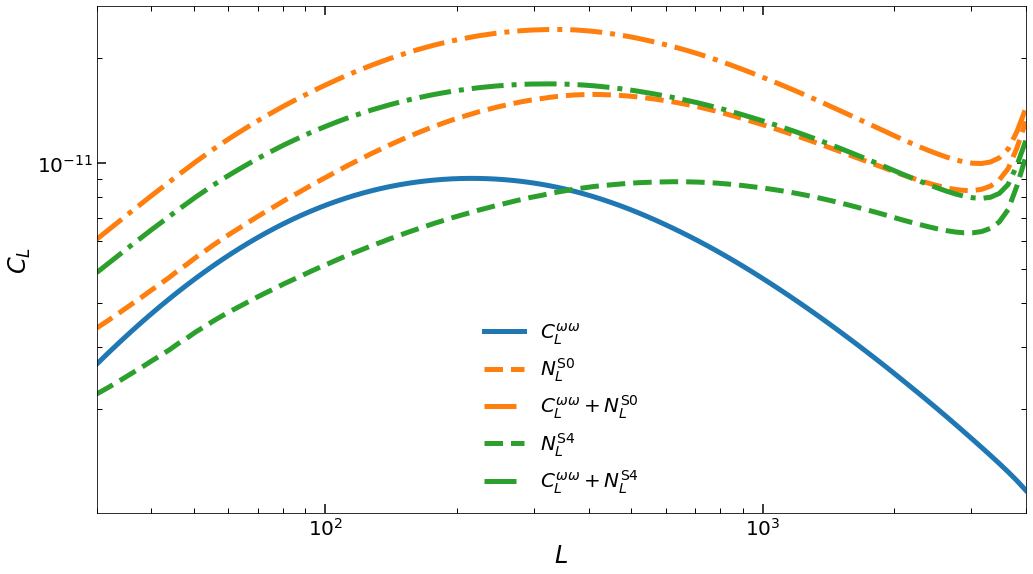

In [78]:
plt.rcParams['figure.figsize'] = [15, 9]
fig, ax = plt.subplots(1,1)
fig.tight_layout(pad=6)
N0_files = ["cache/_N0/N0_foreground_SO_all_base_qe_MV.npy", "cache/_N0/N0_foreground_SO_all_goal_it_MV.npy", "cache/_N0/N0_foreground_S4_all_MV.npy"]
labels = ["SO (baseline)", "SO (goal)", "S4 (baseline)"]
ax.loglog(Ls, omega_ps_spline(Ls), label="$C^{\omega\omega}_L$", linewidth=5)
ax.loglog(Ls, omega_ps_spline(Ls)/F_L_kgI_base - omega_ps_spline(Ls), label="$N_L^{\mathrm{S0}}$", linewidth=5, linestyle="--")
ax.loglog(Ls, omega_ps_spline(Ls)/F_L_kgI_base, label="$C^{\omega\omega}_L+N_L^{\mathrm{S0}}$", linewidth=5, linestyle="dashdot", color=u'#ff7f0e')
# ax[1].loglog(Ls, omega_ps_spline(Ls)/F_L_kgI_goal, label="$C^{\omega\omega}_LF_L^{-1}$ "+labels[1], linewidth=3)
ax.loglog(Ls, omega_ps_spline(Ls)/F_L_kgI_S4 - omega_ps_spline(Ls), label="$N_L^{\mathrm{S4}}$", linewidth=5, linestyle="--")
ax.loglog(Ls, omega_ps_spline(Ls)/F_L_kgI_S4, label="$C^{\omega\omega}_L+N_L^{\mathrm{S4}}$", linewidth=5, linestyle="dashdot",color=u'#2ca02c')
ax.set_ylabel("$C_{L}$", fontsize=24)
ax.set_xlabel("$L$", fontsize=24)
ax.set_xlim(30,4000)
ax.legend(prop={'size': 20}, frameon=False)
ax.tick_params(top=True, right=True, direction="in", which="minor", length=5, width=1)
ax.tick_params(top=True, right=True, direction="in", which="major", length=9, width=1.5)
ax.tick_params(labelsize=20)

plt.show()
t1 = time.time()
fig.savefig("_report_plots/omega_lss_ps_single.pdf", bbox_inches='tight')

Time = 2.9523611068725586


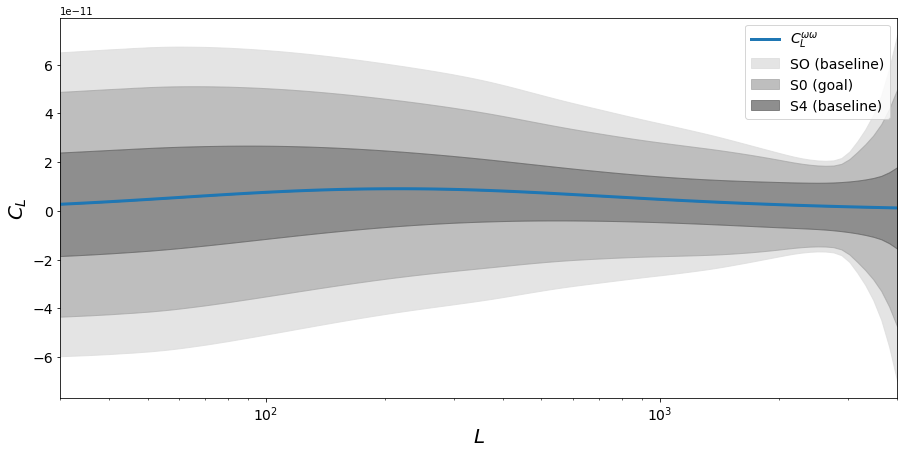

In [145]:
plt.rcParams['figure.figsize'] = [15, 7]
t0 = time.time()
N0_file = "cache/_N0/N0_my_SO_14_14_TQU.npy"
fisher.reset_noise(N0_file)
typs = ["kg", "kI", "gI", "kgI"]
label_typs = ["$\{\kappa g\omega\}$", "$\{\kappa I\omega\}$", "$\{gI\omega\}$", "$\{\kappa gI\omega\}$"]
Ls1 = np.arange(30,40,2)
Ls2 = np.logspace(1, 3, 100)*4
Ls = np.concatenate((Ls1,Ls2))

N0_files = ["cache/_N0/N0_foreground_SO_all_base_qe_MV.npy", "cache/_N0/N0_foreground_SO_all_goal_it_MV.npy", "cache/_N0/N0_foreground_S4_all_MV.npy"]
_noise.setup_cmb_noise(N0_files[0], cmb_offset=2)
N_ww = _noise.get_N0("curl", ellmax=ellmax, tidy=True, ell_factors=False)
N_ww_spline = InterpolatedUnivariateSpline(np.arange(ellmax+1)[2:], N_ww[2:])
labels = ["SO (baseline)", "SO (goal)", "S4 (baseline)"]
plt.semilogx(Ls, omega_ps_spline(Ls), label="$C^{\omega\omega}_L$", linewidth=3)
sig2 = (N_ww_spline(Ls)*omega_ps_spline(Ls)/F_L_kgI_base + omega_ps_spline(Ls)**2)/(2*Ls + 1)
sig = np.sqrt(sig2)
err_base = sig
plt.semilogx(Ls, omega_ps_spline(Ls)+err_base, linewidth=3, linestyle="--", alpha=0)
plt.semilogx(Ls, omega_ps_spline(Ls)-err_base, linewidth=3, linestyle="--", color=u'#ff7f0e', alpha=0)

_noise.setup_cmb_noise(N0_files[1], cmb_offset=2)
N_ww = _noise.get_N0("curl", ellmax=ellmax, tidy=True, ell_factors=False)
N_ww_spline = InterpolatedUnivariateSpline(np.arange(ellmax+1)[2:], N_ww[2:])
sig2 = (N_ww_spline(Ls)*omega_ps_spline(Ls)/F_L_kgI_goal + omega_ps_spline(Ls)**2)/(2*Ls + 1)
sig = np.sqrt(sig2)
err_goal = sig
plt.semilogx(Ls, omega_ps_spline(Ls)+err_goal, linewidth=3, linestyle="--", alpha=0)
plt.semilogx(Ls, omega_ps_spline(Ls)-err_goal, linewidth=3, linestyle="--",color=u'#2ca02c', alpha=0)

_noise.setup_cmb_noise(N0_files[2], cmb_offset=2)
N_ww = _noise.get_N0("curl", ellmax=ellmax, tidy=True, ell_factors=False)
N_ww_spline = InterpolatedUnivariateSpline(np.arange(ellmax+1)[2:], N_ww[2:])
sig2 = (N_ww_spline(Ls)*omega_ps_spline(Ls)/F_L_kgI_S4 + omega_ps_spline(Ls)**2)/(2*Ls + 1)
sig = np.sqrt(sig2)
err_s4 = sig
plt.semilogx(Ls, omega_ps_spline(Ls)+err_s4, linewidth=3, linestyle="--", alpha=0)
plt.semilogx(Ls, omega_ps_spline(Ls)-err_s4, linewidth=3, linestyle="--",color=u'#2ca02c', alpha=0)

plt.fill_between(Ls, omega_ps_spline(Ls)+err_goal,omega_ps_spline(Ls)+err_base, color='gainsboro', alpha=0.75, label="SO (baseline)")
plt.fill_between(Ls, omega_ps_spline(Ls)+err_s4,omega_ps_spline(Ls)+err_goal, color='darkgrey', alpha=0.75, label="S0 (goal)")
plt.fill_between(Ls, omega_ps_spline(Ls),omega_ps_spline(Ls)+err_s4, color='dimgrey', alpha=0.75, label="S4 (baseline)")
plt.fill_between(Ls, omega_ps_spline(Ls)-err_goal,omega_ps_spline(Ls)-err_base, color='gainsboro', alpha=0.75)
plt.fill_between(Ls, omega_ps_spline(Ls)-err_s4,omega_ps_spline(Ls)-err_goal, color='darkgrey', alpha=0.75)
plt.fill_between(Ls, omega_ps_spline(Ls),omega_ps_spline(Ls)-err_s4, color='dimgrey', alpha=0.75)
plt.ylabel("$C_{L}$", fontsize=20)
plt.xlabel("$L$", fontsize=20)
plt.xlim(30,4000)
plt.legend(prop={'size': 14})
plt.tick_params(labelsize=14)

t1 = time.time()
print(f"Time = {t1 - t0}")

Time = 3.026298761367798


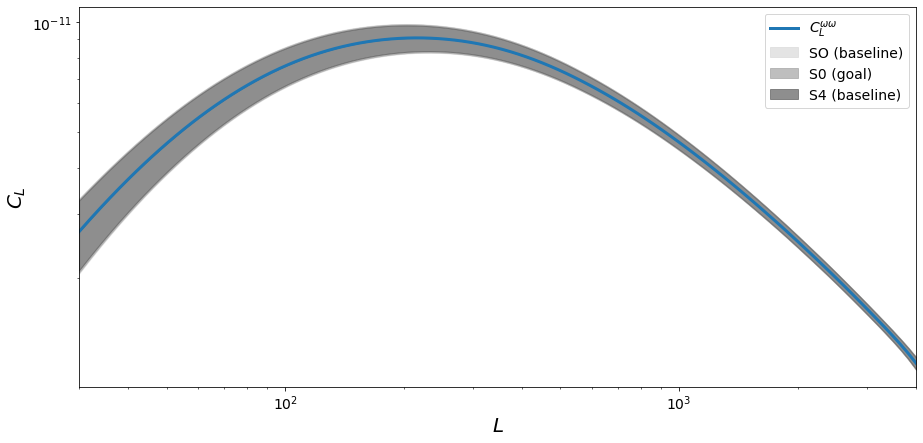

In [147]:
plt.rcParams['figure.figsize'] = [15, 7]
t0 = time.time()
N0_file = "cache/_N0/N0_my_SO_14_14_TQU.npy"
fisher.reset_noise(N0_file)
typs = ["kg", "kI", "gI", "kgI"]
label_typs = ["$\{\kappa g\omega\}$", "$\{\kappa I\omega\}$", "$\{gI\omega\}$", "$\{\kappa gI\omega\}$"]
Ls1 = np.arange(30,40,2)
Ls2 = np.logspace(1, 3, 100)*4
Ls = np.concatenate((Ls1,Ls2))

N0_files = ["cache/_N0/N0_foreground_SO_all_base_qe_MV.npy", "cache/_N0/N0_foreground_SO_all_goal_it_MV.npy", "cache/_N0/N0_foreground_S4_all_MV.npy"]
_noise.setup_cmb_noise(N0_files[0], cmb_offset=2)
N_ww = _noise.get_N0("curl", ellmax=ellmax, tidy=True, ell_factors=False)
N_ww_spline = InterpolatedUnivariateSpline(np.arange(ellmax+1)[2:], N_ww[2:])
labels = ["SO (baseline)", "SO (goal)", "S4 (baseline)"]
plt.loglog(Ls, omega_ps_spline(Ls), label="$C^{\omega\omega}_L$", linewidth=3)
sig2 = ((omega_ps_spline(Ls)**2/F_L_kgI_base - omega_ps_spline(Ls)**2) + 2*omega_ps_spline(Ls)**2)/(2*Ls + 1)
sig = np.sqrt(sig2)
err_base = sig
plt.loglog(Ls, omega_ps_spline(Ls)+err_base, linewidth=3, linestyle="--", alpha=0)
plt.loglog(Ls, omega_ps_spline(Ls)-err_base, linewidth=3, linestyle="--", color=u'#ff7f0e', alpha=0)

_noise.setup_cmb_noise(N0_files[1], cmb_offset=2)
N_ww = _noise.get_N0("curl", ellmax=ellmax, tidy=True, ell_factors=False)
N_ww_spline = InterpolatedUnivariateSpline(np.arange(ellmax+1)[2:], N_ww[2:])
sig2 = ((omega_ps_spline(Ls)**2/F_L_kgI_goal - omega_ps_spline(Ls)**2) + 2*omega_ps_spline(Ls)**2)/(2*Ls + 1)
sig = np.sqrt(sig2)
err_goal = sig
plt.loglog(Ls, omega_ps_spline(Ls)+err_goal, linewidth=3, linestyle="--", alpha=0)
plt.loglog(Ls, omega_ps_spline(Ls)-err_goal, linewidth=3, linestyle="--",color=u'#2ca02c', alpha=0)

_noise.setup_cmb_noise(N0_files[2], cmb_offset=2)
N_ww = _noise.get_N0("curl", ellmax=ellmax, tidy=True, ell_factors=False)
N_ww_spline = InterpolatedUnivariateSpline(np.arange(ellmax+1)[2:], N_ww[2:])
sig2 = ((omega_ps_spline(Ls)**2/F_L_kgI_S4 - omega_ps_spline(Ls)**2) + 2*omega_ps_spline(Ls)**2)/(2*Ls + 1)
sig = np.sqrt(sig2)
err_s4 = sig
plt.loglog(Ls, omega_ps_spline(Ls)+err_s4, linewidth=3, linestyle="--", alpha=0)
plt.loglog(Ls, omega_ps_spline(Ls)-err_s4, linewidth=3, linestyle="--",color=u'#2ca02c', alpha=0)

plt.fill_between(Ls, omega_ps_spline(Ls)+err_goal,omega_ps_spline(Ls)+err_base, color='gainsboro', alpha=0.75, label="SO (baseline)")
plt.fill_between(Ls, omega_ps_spline(Ls)+err_s4,omega_ps_spline(Ls)+err_goal, color='darkgrey', alpha=0.75, label="S0 (goal)")
plt.fill_between(Ls, omega_ps_spline(Ls),omega_ps_spline(Ls)+err_s4, color='dimgrey', alpha=0.75, label="S4 (baseline)")
plt.fill_between(Ls, omega_ps_spline(Ls)-err_goal,omega_ps_spline(Ls)-err_base, color='gainsboro', alpha=0.75)
plt.fill_between(Ls, omega_ps_spline(Ls)-err_s4,omega_ps_spline(Ls)-err_goal, color='darkgrey', alpha=0.75)
plt.fill_between(Ls, omega_ps_spline(Ls),omega_ps_spline(Ls)-err_s4, color='dimgrey', alpha=0.75)
plt.ylabel("$C_{L}$", fontsize=20)
plt.xlabel("$L$", fontsize=20)
plt.xlim(30,4000)
plt.legend(prop={'size': 14})
plt.tick_params(labelsize=14)

t1 = time.time()
print(f"Time = {t1 - t0}")

[  20.           30.           40.           55.57981977   77.22790916
  107.30783181  149.10374881  207.17898717  287.8742692   400.
  555.79819775  772.27909155 1073.07831811 1491.03748813 2071.78987169
 2878.742692   4000.         5121.257308  ]
[10.0, 12.789909887462748, 18.61395457766499, 25.864006018131768, 35.9379198286338, 49.93557767902968, 69.38526019393163, 96.4105064153758, 133.96196427439708, 186.13954577664992, 258.6400601813174, 359.37919828633767, 499.3557767902977, 693.8526019393152, 964.1050641537574, 1121.2573079953945]
Time = 3.127535104751587


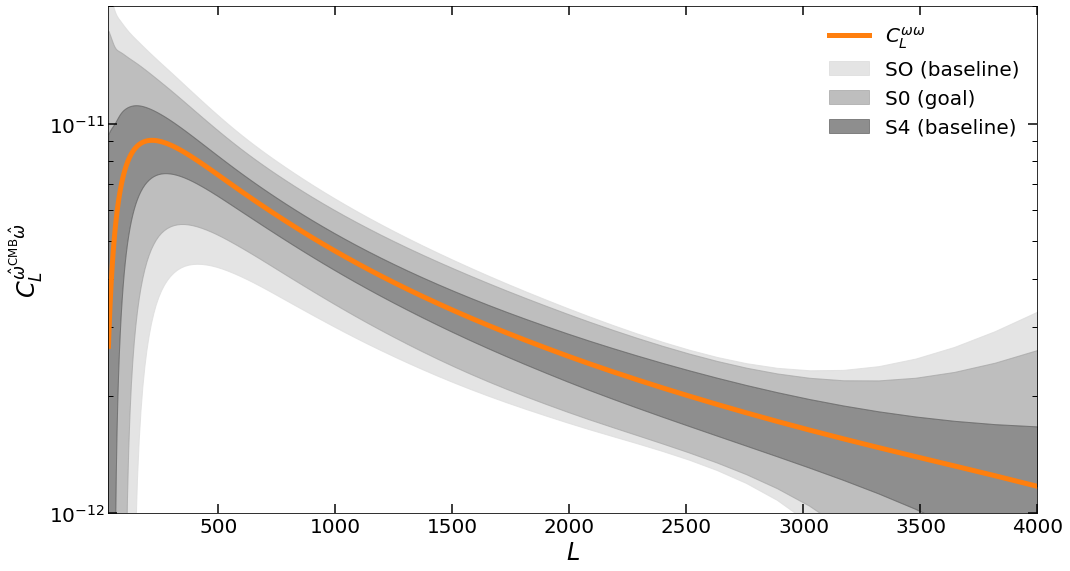

In [79]:
plt.rcParams['figure.figsize'] = [15, 9]
t0 = time.time()
N0_file = "cache/_N0/N0_my_SO_14_14_TQU.npy"
fisher.reset_noise(N0_file)
typs = ["kg", "kI", "gI", "kgI"]
label_typs = ["$\{\kappa g\omega\}$", "$\{\kappa I\omega\}$", "$\{gI\omega\}$", "$\{\kappa gI\omega\}$"]
Ls1 = np.arange(30,40,2)
Ls2 = np.logspace(1, 3, 100)*4
Ls = np.concatenate((Ls1,Ls2))
F_L_kgI_base_spline = InterpolatedUnivariateSpline(Ls, F_L_kgI_base)
F_L_kgI_goal_spline = InterpolatedUnivariateSpline(Ls, F_L_kgI_goal)
F_L_kgI_S4_spline = InterpolatedUnivariateSpline(Ls, F_L_kgI_S4)

Ls1 = np.arange(30,40,10)
Ls2 = np.logspace(1, 3, 15)*4
Ls_sig = np.concatenate((Ls1,Ls2))
Ls_sig_big = np.concatenate((Ls1,Ls2))
Ls_sig_big = np.append(Ls_sig_big, Ls_sig[-1]+(Ls_sig[-1]-Ls_sig[-2]))
Ls_sig_big = np.append([Ls_sig[0]-(Ls_sig[1]-Ls_sig[0])], Ls_sig_big)
print(Ls_sig_big)
ns = [(Ls_sig_big[iii]-Ls_sig_big[iii])/2 + (Ls_sig_big[iii+1]-Ls_sig_big[iii-1])/2 for iii in range(1, np.size(Ls_sig)+1)]
print(ns)
fig, ax = plt.subplots(1,1)
fig.tight_layout(pad=6)


N0_files = ["cache/_N0/N0_foreground_SO_all_base_qe_MV.npy", "cache/_N0/N0_foreground_SO_all_goal_it_MV.npy", "cache/_N0/N0_foreground_S4_all_MV.npy"]
_noise.setup_cmb_noise(N0_files[0], cmb_offset=2)
N_ww = _noise.get_N0("curl", ellmax=ellmax, tidy=True, ell_factors=False)
N_ww_spline = InterpolatedUnivariateSpline(np.arange(ellmax+1)[2:], N_ww[2:])
labels = ["SO (baseline)", "SO (goal)", "S4 (baseline)"]
ax.semilogy(Ls, omega_ps_spline(Ls), label="$C^{\omega\omega}_L$", linewidth=5, color=u'#ff7f0e')
sig2 = ((omega_ps_spline(Ls_sig)+N_ww_spline(Ls_sig))*omega_ps_spline(Ls_sig)/F_L_kgI_base_spline(Ls_sig) + omega_ps_spline(Ls_sig)**2)/(2*Ls_sig + 1)
sig = np.sqrt(sig2)
err_base = sig/(np.sqrt(ns))
err_base_spline = InterpolatedUnivariateSpline(Ls_sig,err_base)
ax.semilogy(Ls, omega_ps_spline(Ls)+err_base_spline(Ls), linewidth=5, linestyle="--", alpha=0)
ax.semilogy(Ls, omega_ps_spline(Ls)-err_base_spline(Ls), linewidth=5, linestyle="--", color=u'#ff7f0e', alpha=0)

_noise.setup_cmb_noise(N0_files[1], cmb_offset=2)
N_ww = _noise.get_N0("curl", ellmax=ellmax, tidy=True, ell_factors=False)
N_ww_spline = InterpolatedUnivariateSpline(np.arange(ellmax+1)[2:], N_ww[2:])
sig2 = ((omega_ps_spline(Ls_sig)+N_ww_spline(Ls_sig))*omega_ps_spline(Ls_sig)/F_L_kgI_goal_spline(Ls_sig) + omega_ps_spline(Ls_sig)**2)/(2*Ls_sig + 1)
sig = np.sqrt(sig2)
err_goal = sig/(np.sqrt(ns))
err_goal_spline = InterpolatedUnivariateSpline(Ls_sig,err_goal)
ax.semilogy(Ls, omega_ps_spline(Ls)+err_goal_spline(Ls), linewidth=5, linestyle="--", alpha=0)
ax.semilogy(Ls, omega_ps_spline(Ls)-err_goal_spline(Ls), linewidth=5, linestyle="--",color=u'#2ca02c', alpha=0)

_noise.setup_cmb_noise(N0_files[2], cmb_offset=2)
N_ww = _noise.get_N0("curl", ellmax=ellmax, tidy=True, ell_factors=False)
N_ww_spline = InterpolatedUnivariateSpline(np.arange(ellmax+1)[2:], N_ww[2:])
sig2 = ((omega_ps_spline(Ls_sig)+N_ww_spline(Ls_sig))*omega_ps_spline(Ls_sig)/F_L_kgI_S4_spline(Ls_sig) + omega_ps_spline(Ls_sig)**2)/(2*Ls_sig + 1)
sig = np.sqrt(sig2)
err_s4 = sig/(np.sqrt(ns))
err_s4_spline = InterpolatedUnivariateSpline(Ls_sig,err_s4)
ax.semilogy(Ls, omega_ps_spline(Ls)+err_s4_spline(Ls), linewidth=5, linestyle="--", alpha=0)
ax.semilogy(Ls, omega_ps_spline(Ls)-err_s4_spline(Ls), linewidth=5, linestyle="--",color=u'#2ca02c', alpha=0)

ax.fill_between(Ls, omega_ps_spline(Ls)+err_goal_spline(Ls),omega_ps_spline(Ls)+err_base_spline(Ls), color='gainsboro', alpha=0.75, label="SO (baseline)")
ax.fill_between(Ls, omega_ps_spline(Ls)+err_s4_spline(Ls),omega_ps_spline(Ls)+err_goal_spline(Ls), color='darkgrey', alpha=0.75, label="S0 (goal)")
ax.fill_between(Ls, omega_ps_spline(Ls),omega_ps_spline(Ls)+err_s4_spline(Ls), color='dimgrey', alpha=0.75, label="S4 (baseline)")
ax.fill_between(Ls, omega_ps_spline(Ls)-err_goal_spline(Ls),omega_ps_spline(Ls)-err_base_spline(Ls), color='gainsboro', alpha=0.75)
ax.fill_between(Ls, omega_ps_spline(Ls)-err_s4_spline(Ls),omega_ps_spline(Ls)-err_goal_spline(Ls), color='darkgrey', alpha=0.75)
ax.fill_between(Ls, omega_ps_spline(Ls),omega_ps_spline(Ls)-err_s4_spline(Ls), color='dimgrey', alpha=0.75)
ax.set_ylabel("$C^{\hat{\omega}^{\mathrm{CMB}}\hat{\omega}}_{L}$", fontsize=24)
ax.set_xlabel("$L$", fontsize=24)
ax.set_xlim(30,4000)
ax.set_ylim(1e-12,2e-11)
ax.legend(prop={'size': 20}, frameon=False)
ax.tick_params(top=True, right=True, direction="in", which="minor", length=5, width=1)
ax.tick_params(top=True, right=True, direction="in", which="major", length=9, width=1.5)
ax.tick_params(labelsize=20)



t1 = time.time()
print(f"Time = {t1 - t0}")
fig.savefig("_report_plots/omega_cross_binned_semilogy.pdf", bbox_inches='tight')
plt.show()

[  20.           30.           40.           55.57981977   77.22790916
  107.30783181  149.10374881  207.17898717  287.8742692   400.
  555.79819775  772.27909155 1073.07831811 1491.03748813 2071.78987169
 2878.742692   4000.         5121.257308  ]
[10.0, 12.789909887462748, 18.61395457766499, 25.864006018131768, 35.9379198286338, 49.93557767902968, 69.38526019393163, 96.4105064153758, 133.96196427439708, 186.13954577664992, 258.6400601813174, 359.37919828633767, 499.3557767902977, 693.8526019393152, 964.1050641537574, 1121.2573079953945]
Time = 3.0677268505096436


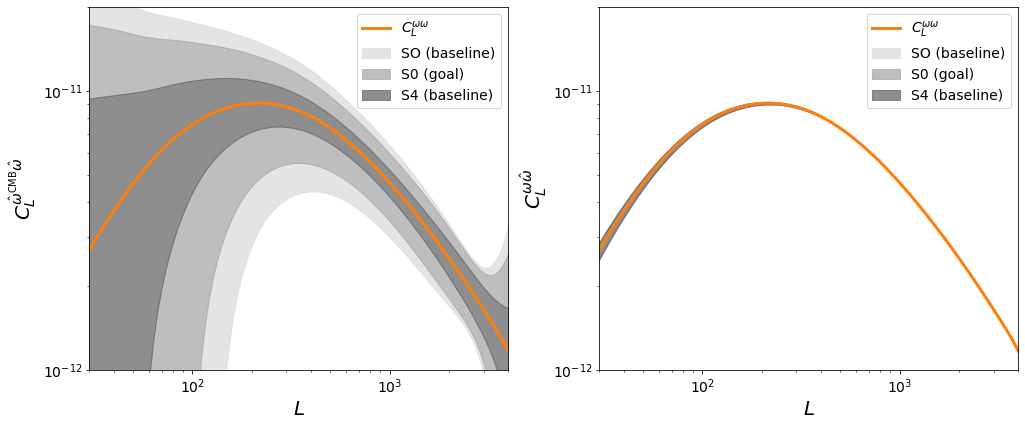

In [193]:
plt.rcParams['figure.figsize'] = [15, 7]
t0 = time.time()
N0_file = "cache/_N0/N0_my_SO_14_14_TQU.npy"
fisher.reset_noise(N0_file)
typs = ["kg", "kI", "gI", "kgI"]
label_typs = ["$\{\kappa g\omega\}$", "$\{\kappa I\omega\}$", "$\{gI\omega\}$", "$\{\kappa gI\omega\}$"]
Ls1 = np.arange(30,40,2)
Ls2 = np.logspace(1, 3, 100)*4
Ls = np.concatenate((Ls1,Ls2))
F_L_kgI_base_spline = InterpolatedUnivariateSpline(Ls, F_L_kgI_base)
F_L_kgI_goal_spline = InterpolatedUnivariateSpline(Ls, F_L_kgI_goal)
F_L_kgI_S4_spline = InterpolatedUnivariateSpline(Ls, F_L_kgI_S4)

Ls1 = np.arange(30,40,10)
Ls2 = np.logspace(1, 3, 15)*4
Ls_sig = np.concatenate((Ls1,Ls2))
Ls_sig_big = np.concatenate((Ls1,Ls2))
Ls_sig_big = np.append(Ls_sig_big, Ls_sig[-1]+(Ls_sig[-1]-Ls_sig[-2]))
Ls_sig_big = np.append([Ls_sig[0]-(Ls_sig[1]-Ls_sig[0])], Ls_sig_big)
print(Ls_sig_big)
ns = [(Ls_sig_big[iii]-Ls_sig_big[iii])/2 + (Ls_sig_big[iii+1]-Ls_sig_big[iii-1])/2 for iii in range(1, np.size(Ls_sig)+1)]
print(ns)
fig, ax = plt.subplots(1,2)
fig.tight_layout(pad=6)


N0_files = ["cache/_N0/N0_foreground_SO_all_base_qe_MV.npy", "cache/_N0/N0_foreground_SO_all_goal_it_MV.npy", "cache/_N0/N0_foreground_S4_all_MV.npy"]
_noise.setup_cmb_noise(N0_files[0], cmb_offset=2)
N_ww = _noise.get_N0("curl", ellmax=ellmax, tidy=True, ell_factors=False)
N_ww_spline = InterpolatedUnivariateSpline(np.arange(ellmax+1)[2:], N_ww[2:])
labels = ["SO (baseline)", "SO (goal)", "S4 (baseline)"]
ax[0].loglog(Ls, omega_ps_spline(Ls), label="$C^{\omega\omega}_L$", linewidth=3, color=u'#ff7f0e')
sig2 = ((omega_ps_spline(Ls_sig)+N_ww_spline(Ls_sig))*omega_ps_spline(Ls_sig)/F_L_kgI_base_spline(Ls_sig) + omega_ps_spline(Ls_sig)**2)/(2*Ls_sig + 1)
sig = np.sqrt(sig2)
err_base = sig/(np.sqrt(ns))
err_base_spline = InterpolatedUnivariateSpline(Ls_sig,err_base)
ax[0].loglog(Ls, omega_ps_spline(Ls)+err_base_spline(Ls), linewidth=3, linestyle="--", alpha=0)
ax[0].loglog(Ls, omega_ps_spline(Ls)-err_base_spline(Ls), linewidth=3, linestyle="--", color=u'#ff7f0e', alpha=0)

_noise.setup_cmb_noise(N0_files[1], cmb_offset=2)
N_ww = _noise.get_N0("curl", ellmax=ellmax, tidy=True, ell_factors=False)
N_ww_spline = InterpolatedUnivariateSpline(np.arange(ellmax+1)[2:], N_ww[2:])
sig2 = ((omega_ps_spline(Ls_sig)+N_ww_spline(Ls_sig))*omega_ps_spline(Ls_sig)/F_L_kgI_goal_spline(Ls_sig) + omega_ps_spline(Ls_sig)**2)/(2*Ls_sig + 1)
sig = np.sqrt(sig2)
err_goal = sig/(np.sqrt(ns))
err_goal_spline = InterpolatedUnivariateSpline(Ls_sig,err_goal)
ax[0].loglog(Ls, omega_ps_spline(Ls)+err_goal_spline(Ls), linewidth=3, linestyle="--", alpha=0)
ax[0].loglog(Ls, omega_ps_spline(Ls)-err_goal_spline(Ls), linewidth=3, linestyle="--",color=u'#2ca02c', alpha=0)

_noise.setup_cmb_noise(N0_files[2], cmb_offset=2)
N_ww = _noise.get_N0("curl", ellmax=ellmax, tidy=True, ell_factors=False)
N_ww_spline = InterpolatedUnivariateSpline(np.arange(ellmax+1)[2:], N_ww[2:])
sig2 = ((omega_ps_spline(Ls_sig)+N_ww_spline(Ls_sig))*omega_ps_spline(Ls_sig)/F_L_kgI_S4_spline(Ls_sig) + omega_ps_spline(Ls_sig)**2)/(2*Ls_sig + 1)
sig = np.sqrt(sig2)
err_s4 = sig/(np.sqrt(ns))
err_s4_spline = InterpolatedUnivariateSpline(Ls_sig,err_s4)
ax[0].loglog(Ls, omega_ps_spline(Ls)+err_s4_spline(Ls), linewidth=3, linestyle="--", alpha=0)
ax[0].loglog(Ls, omega_ps_spline(Ls)-err_s4_spline(Ls), linewidth=3, linestyle="--",color=u'#2ca02c', alpha=0)

ax[0].fill_between(Ls, omega_ps_spline(Ls)+err_goal_spline(Ls),omega_ps_spline(Ls)+err_base_spline(Ls), color='gainsboro', alpha=0.75, label="SO (baseline)")
ax[0].fill_between(Ls, omega_ps_spline(Ls)+err_s4_spline(Ls),omega_ps_spline(Ls)+err_goal_spline(Ls), color='darkgrey', alpha=0.75, label="S0 (goal)")
ax[0].fill_between(Ls, omega_ps_spline(Ls),omega_ps_spline(Ls)+err_s4_spline(Ls), color='dimgrey', alpha=0.75, label="S4 (baseline)")
ax[0].fill_between(Ls, omega_ps_spline(Ls)-err_goal_spline(Ls),omega_ps_spline(Ls)-err_base_spline(Ls), color='gainsboro', alpha=0.75)
ax[0].fill_between(Ls, omega_ps_spline(Ls)-err_s4_spline(Ls),omega_ps_spline(Ls)-err_goal_spline(Ls), color='darkgrey', alpha=0.75)
ax[0].fill_between(Ls, omega_ps_spline(Ls),omega_ps_spline(Ls)-err_s4_spline(Ls), color='dimgrey', alpha=0.75)
ax[0].set_ylabel("$C^{\hat{\omega}^{\mathrm{CMB}}\hat{\omega}}_{L}$", fontsize=20)
ax[0].set_xlabel("$L$", fontsize=20)
ax[0].set_xlim(30,4000)
ax[0].set_ylim(1e-12,2e-11)
ax[0].legend(prop={'size': 14})
ax[0].tick_params(labelsize=14)




N0_files = ["cache/_N0/N0_foreground_SO_all_base_qe_MV.npy", "cache/_N0/N0_foreground_SO_all_goal_it_MV.npy", "cache/_N0/N0_foreground_S4_all_MV.npy"]
_noise.setup_cmb_noise(N0_files[0], cmb_offset=2)
N_ww = _noise.get_N0("curl", ellmax=ellmax, tidy=True, ell_factors=False)
N_ww_spline = InterpolatedUnivariateSpline(np.arange(ellmax+1)[2:], N_ww[2:])
labels = ["SO (baseline)", "SO (goal)", "S4 (baseline)"]
ax[1].loglog(Ls, omega_ps_spline(Ls), label="$C^{\omega\omega}_L$", linewidth=3, color=u'#ff7f0e')
sig2 = ((omega_ps_spline(Ls_sig)**2/F_L_kgI_base_spline(Ls_sig) - omega_ps_spline(Ls_sig)**2) + 2*omega_ps_spline(Ls_sig)**2)/(2*Ls_sig + 1)
sig = np.sqrt(sig2)
err_base = sig/(np.sqrt(ns))
err_base_spline = InterpolatedUnivariateSpline(Ls_sig,err_base)
ax[1].loglog(Ls, omega_ps_spline(Ls)+err_base_spline(Ls), linewidth=3, linestyle="--", alpha=0)
ax[1].loglog(Ls, omega_ps_spline(Ls)-err_base_spline(Ls), linewidth=3, linestyle="--", color=u'#ff7f0e', alpha=0)

_noise.setup_cmb_noise(N0_files[1], cmb_offset=2)
N_ww = _noise.get_N0("curl", ellmax=ellmax, tidy=True, ell_factors=False)
N_ww_spline = InterpolatedUnivariateSpline(np.arange(ellmax+1)[2:], N_ww[2:])
sig2 = ((omega_ps_spline(Ls_sig)**2/F_L_kgI_goal_spline(Ls_sig) - omega_ps_spline(Ls_sig)**2) + 2*omega_ps_spline(Ls_sig)**2)/(2*Ls_sig + 1)
sig = np.sqrt(sig2)
err_goal = sig/(np.sqrt(ns))
err_goal_spline = InterpolatedUnivariateSpline(Ls_sig,err_goal)
ax[1].loglog(Ls, omega_ps_spline(Ls)+err_goal_spline(Ls), linewidth=3, linestyle="--", alpha=0)
ax[1].loglog(Ls, omega_ps_spline(Ls)-err_goal_spline(Ls), linewidth=3, linestyle="--",color=u'#2ca02c', alpha=0)

_noise.setup_cmb_noise(N0_files[2], cmb_offset=2)
N_ww = _noise.get_N0("curl", ellmax=ellmax, tidy=True, ell_factors=False)
N_ww_spline = InterpolatedUnivariateSpline(np.arange(ellmax+1)[2:], N_ww[2:])
sig2 = ((omega_ps_spline(Ls_sig)**2/F_L_kgI_S4_spline(Ls_sig) - omega_ps_spline(Ls_sig)**2) + 2*omega_ps_spline(Ls_sig)**2)/(2*Ls_sig + 1)
sig = np.sqrt(sig2)
err_s4 = sig/(np.sqrt(ns))
err_s4_spline = InterpolatedUnivariateSpline(Ls_sig,err_s4)
ax[1].loglog(Ls, omega_ps_spline(Ls)+err_s4_spline(Ls), linewidth=3, linestyle="--", alpha=0)
ax[1].loglog(Ls, omega_ps_spline(Ls)-err_s4_spline(Ls), linewidth=3, linestyle="--",color=u'#2ca02c', alpha=0)

ax[1].fill_between(Ls, omega_ps_spline(Ls)+err_goal_spline(Ls),omega_ps_spline(Ls)+err_base_spline(Ls), color='gainsboro', alpha=0.75, label="SO (baseline)")
ax[1].fill_between(Ls, omega_ps_spline(Ls)+err_s4_spline(Ls),omega_ps_spline(Ls)+err_goal_spline(Ls), color='darkgrey', alpha=0.75, label="S0 (goal)")
ax[1].fill_between(Ls, omega_ps_spline(Ls),omega_ps_spline(Ls)+err_s4_spline(Ls), color='dimgrey', alpha=0.75, label="S4 (baseline)")
ax[1].fill_between(Ls, omega_ps_spline(Ls)-err_goal_spline(Ls),omega_ps_spline(Ls)-err_base_spline(Ls), color='gainsboro', alpha=0.75)
ax[1].fill_between(Ls, omega_ps_spline(Ls)-err_s4_spline(Ls),omega_ps_spline(Ls)-err_goal_spline(Ls), color='darkgrey', alpha=0.75)
ax[1].fill_between(Ls, omega_ps_spline(Ls),omega_ps_spline(Ls)-err_s4_spline(Ls), color='dimgrey', alpha=0.75)
ax[1].set_ylabel("$C^{\omega\hat{\omega}}_{L}$", fontsize=20)
ax[1].set_xlabel("$L$", fontsize=20)
ax[1].set_xlim(30,4000)
ax[1].set_ylim(1e-12,2e-11)
ax[1].legend(prop={'size': 14})
ax[1].tick_params(labelsize=14)

t1 = time.time()
print(f"Time = {t1 - t0}")

Time = 3.079134941101074


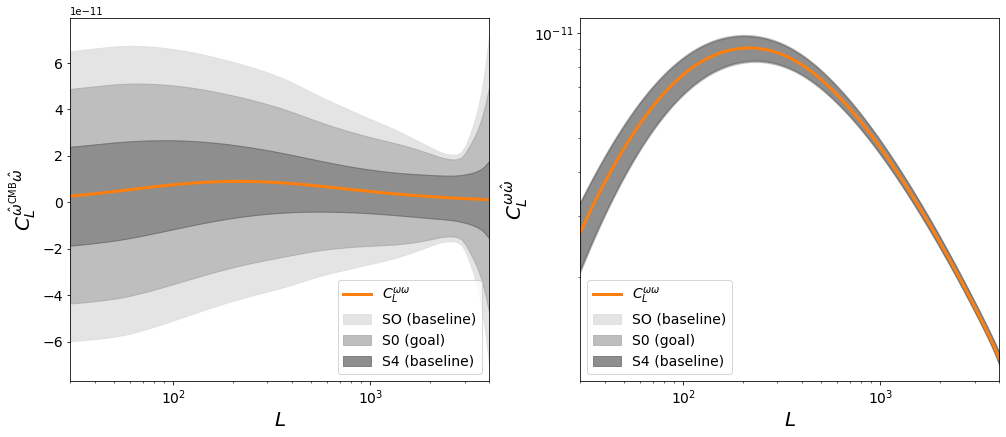

In [166]:
plt.rcParams['figure.figsize'] = [15, 7]
t0 = time.time()
N0_file = "cache/_N0/N0_my_SO_14_14_TQU.npy"
fisher.reset_noise(N0_file)
typs = ["kg", "kI", "gI", "kgI"]
label_typs = ["$\{\kappa g\omega\}$", "$\{\kappa I\omega\}$", "$\{gI\omega\}$", "$\{\kappa gI\omega\}$"]
Ls1 = np.arange(30,40,2)
Ls2 = np.logspace(1, 3, 100)*4
Ls = np.concatenate((Ls1,Ls2))

fig, ax = plt.subplots(1,2)
fig.tight_layout(pad=6)

N0_files = ["cache/_N0/N0_foreground_SO_all_base_qe_MV.npy", "cache/_N0/N0_foreground_SO_all_goal_it_MV.npy", "cache/_N0/N0_foreground_S4_all_MV.npy"]
_noise.setup_cmb_noise(N0_files[0], cmb_offset=2)
N_ww = _noise.get_N0("curl", ellmax=ellmax, tidy=True, ell_factors=False)
N_ww_spline = InterpolatedUnivariateSpline(np.arange(ellmax+1)[2:], N_ww[2:])
labels = ["SO (baseline)", "SO (goal)", "S4 (baseline)"]
ax[0].semilogx(Ls, omega_ps_spline(Ls), label="$C^{\omega\omega}_L$", linewidth=3, color=u'#ff7f0e')
sig2 = ((omega_ps_spline(Ls)+N_ww_spline(Ls))*omega_ps_spline(Ls)/F_L_kgI_base + omega_ps_spline(Ls)**2)/(2*Ls + 1)
sig = np.sqrt(sig2)
err_base = sig
ax[0].semilogx(Ls, omega_ps_spline(Ls)+err_base, linewidth=3, linestyle="--", alpha=0)
ax[0].semilogx(Ls, omega_ps_spline(Ls)-err_base, linewidth=3, linestyle="--", color=u'#ff7f0e', alpha=0)

_noise.setup_cmb_noise(N0_files[1], cmb_offset=2)
N_ww = _noise.get_N0("curl", ellmax=ellmax, tidy=True, ell_factors=False)
N_ww_spline = InterpolatedUnivariateSpline(np.arange(ellmax+1)[2:], N_ww[2:])
sig2 = ((omega_ps_spline(Ls)+N_ww_spline(Ls))*omega_ps_spline(Ls)/F_L_kgI_goal + omega_ps_spline(Ls)**2)/(2*Ls + 1)
sig = np.sqrt(sig2)
err_goal = sig
ax[0].semilogx(Ls, omega_ps_spline(Ls)+err_goal, linewidth=3, linestyle="--", alpha=0)
ax[0].semilogx(Ls, omega_ps_spline(Ls)-err_goal, linewidth=3, linestyle="--",color=u'#2ca02c', alpha=0)

_noise.setup_cmb_noise(N0_files[2], cmb_offset=2)
N_ww = _noise.get_N0("curl", ellmax=ellmax, tidy=True, ell_factors=False)
N_ww_spline = InterpolatedUnivariateSpline(np.arange(ellmax+1)[2:], N_ww[2:])
sig2 = ((omega_ps_spline(Ls)+N_ww_spline(Ls))*omega_ps_spline(Ls)/F_L_kgI_S4 + omega_ps_spline(Ls)**2)/(2*Ls + 1)
sig = np.sqrt(sig2)
err_s4 = sig
ax[0].semilogx(Ls, omega_ps_spline(Ls)+err_s4, linewidth=3, linestyle="--", alpha=0)
ax[0].semilogx(Ls, omega_ps_spline(Ls)-err_s4, linewidth=3, linestyle="--",color=u'#2ca02c', alpha=0)

ax[0].fill_between(Ls, omega_ps_spline(Ls)+err_goal,omega_ps_spline(Ls)+err_base, color='gainsboro', alpha=0.75, label="SO (baseline)")
ax[0].fill_between(Ls, omega_ps_spline(Ls)+err_s4,omega_ps_spline(Ls)+err_goal, color='darkgrey', alpha=0.75, label="S0 (goal)")
ax[0].fill_between(Ls, omega_ps_spline(Ls),omega_ps_spline(Ls)+err_s4, color='dimgrey', alpha=0.75, label="S4 (baseline)")
ax[0].fill_between(Ls, omega_ps_spline(Ls)-err_goal,omega_ps_spline(Ls)-err_base, color='gainsboro', alpha=0.75)
ax[0].fill_between(Ls, omega_ps_spline(Ls)-err_s4,omega_ps_spline(Ls)-err_goal, color='darkgrey', alpha=0.75)
ax[0].fill_between(Ls, omega_ps_spline(Ls),omega_ps_spline(Ls)-err_s4, color='dimgrey', alpha=0.75)
ax[0].set_ylabel("$C^{\hat{\omega}^{\mathrm{CMB}}\hat{\omega}}_{L}$", fontsize=20)
ax[0].set_xlabel("$L$", fontsize=20)
ax[0].set_xlim(30,4000)
ax[0].legend(prop={'size': 14})
ax[0].tick_params(labelsize=14)




N0_files = ["cache/_N0/N0_foreground_SO_all_base_qe_MV.npy", "cache/_N0/N0_foreground_SO_all_goal_it_MV.npy", "cache/_N0/N0_foreground_S4_all_MV.npy"]
_noise.setup_cmb_noise(N0_files[0], cmb_offset=2)
N_ww = _noise.get_N0("curl", ellmax=ellmax, tidy=True, ell_factors=False)
N_ww_spline = InterpolatedUnivariateSpline(np.arange(ellmax+1)[2:], N_ww[2:])
labels = ["SO (baseline)", "SO (goal)", "S4 (baseline)"]
ax[1].loglog(Ls, omega_ps_spline(Ls), label="$C^{\omega\omega}_L$", linewidth=3, color=u'#ff7f0e')
sig2 = ((omega_ps_spline(Ls)**2/F_L_kgI_base - omega_ps_spline(Ls)**2) + 2*omega_ps_spline(Ls)**2)/(2*Ls + 1)
sig = np.sqrt(sig2)
err_base = sig
ax[1].loglog(Ls, omega_ps_spline(Ls)+err_base, linewidth=3, linestyle="--", alpha=0)
ax[1].loglog(Ls, omega_ps_spline(Ls)-err_base, linewidth=3, linestyle="--", color=u'#ff7f0e', alpha=0)

_noise.setup_cmb_noise(N0_files[1], cmb_offset=2)
N_ww = _noise.get_N0("curl", ellmax=ellmax, tidy=True, ell_factors=False)
N_ww_spline = InterpolatedUnivariateSpline(np.arange(ellmax+1)[2:], N_ww[2:])
sig2 = ((omega_ps_spline(Ls)**2/F_L_kgI_goal - omega_ps_spline(Ls)**2) + 2*omega_ps_spline(Ls)**2)/(2*Ls + 1)
sig = np.sqrt(sig2)
err_goal = sig
ax[1].loglog(Ls, omega_ps_spline(Ls)+err_goal, linewidth=3, linestyle="--", alpha=0)
ax[1].loglog(Ls, omega_ps_spline(Ls)-err_goal, linewidth=3, linestyle="--",color=u'#2ca02c', alpha=0)

_noise.setup_cmb_noise(N0_files[2], cmb_offset=2)
N_ww = _noise.get_N0("curl", ellmax=ellmax, tidy=True, ell_factors=False)
N_ww_spline = InterpolatedUnivariateSpline(np.arange(ellmax+1)[2:], N_ww[2:])
sig2 = ((omega_ps_spline(Ls)**2/F_L_kgI_S4 - omega_ps_spline(Ls)**2) + 2*omega_ps_spline(Ls)**2)/(2*Ls + 1)
sig = np.sqrt(sig2)
err_s4 = sig
ax[1].loglog(Ls, omega_ps_spline(Ls)+err_s4, linewidth=3, linestyle="--", alpha=0)
ax[1].loglog(Ls, omega_ps_spline(Ls)-err_s4, linewidth=3, linestyle="--",color=u'#2ca02c', alpha=0)

ax[1].fill_between(Ls, omega_ps_spline(Ls)+err_goal,omega_ps_spline(Ls)+err_base, color='gainsboro', alpha=0.75, label="SO (baseline)")
ax[1].fill_between(Ls, omega_ps_spline(Ls)+err_s4,omega_ps_spline(Ls)+err_goal, color='darkgrey', alpha=0.75, label="S0 (goal)")
ax[1].fill_between(Ls, omega_ps_spline(Ls),omega_ps_spline(Ls)+err_s4, color='dimgrey', alpha=0.75, label="S4 (baseline)")
ax[1].fill_between(Ls, omega_ps_spline(Ls)-err_goal,omega_ps_spline(Ls)-err_base, color='gainsboro', alpha=0.75)
ax[1].fill_between(Ls, omega_ps_spline(Ls)-err_s4,omega_ps_spline(Ls)-err_goal, color='darkgrey', alpha=0.75)
ax[1].fill_between(Ls, omega_ps_spline(Ls),omega_ps_spline(Ls)-err_s4, color='dimgrey', alpha=0.75)
ax[1].set_ylabel("$C^{\omega\hat{\omega}}_{L}$", fontsize=20)
ax[1].set_xlabel("$L$", fontsize=20)
ax[1].set_xlim(30,4000)
ax[1].legend(prop={'size': 14})
ax[1].tick_params(labelsize=14)

t1 = time.time()
print(f"Time = {t1 - t0}")

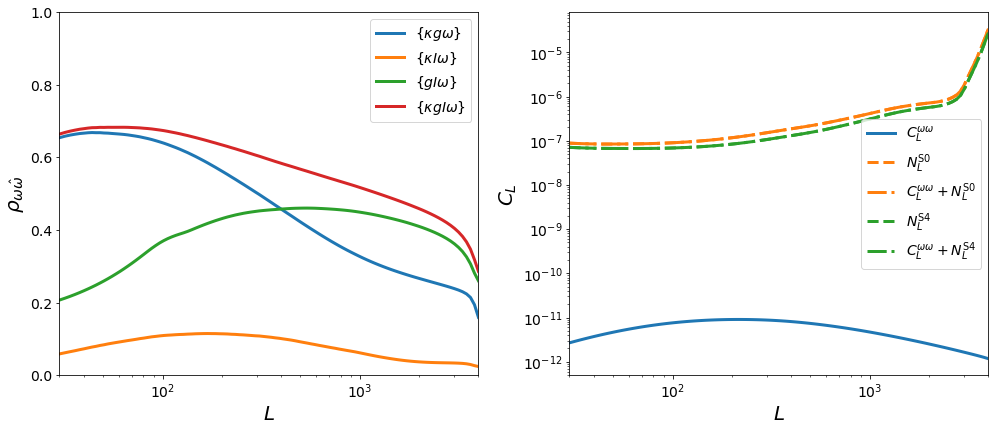

Time = 3.4114949703216553


In [111]:
plt.rcParams['figure.figsize'] = [15, 7]
t0 = time.time()
N0_file = "cache/_N0/N0_my_SO_14_14_TQU.npy"
fisher.reset_noise(N0_file)
typs = ["kg", "kI", "gI", "kgI"]
label_typs = ["$\{\kappa g\omega\}$", "$\{\kappa I\omega\}$", "$\{gI\omega\}$", "$\{\kappa gI\omega\}$"]
Ls1 = np.arange(30,40,2)
Ls2 = np.logspace(1, 3, 100)*4
Ls = np.concatenate((Ls1,Ls2))
fig, ax = plt.subplots(1,2)
fig.tight_layout(pad=6)
ax[0].semilogx(Ls, np.sqrt(F_L_kg), label=label_typs[0], linewidth=3)
ax[0].semilogx(Ls, np.sqrt(F_L_kI), label=label_typs[1], linewidth=3)
ax[0].semilogx(Ls, np.sqrt(F_L_gI), label=label_typs[2], linewidth=3)
ax[0].semilogx(Ls, np.sqrt(F_L_kgI), label=label_typs[3], linewidth=3)
ax[0].set_ylabel(r'$\rho_{\omega\hat{\omega}}$', fontsize=20)
ax[0].set_xlabel("$L$", fontsize=20)
ax[0].set_xlim(30,4000)
ax[0].set_ylim(0,1)
ax[0].legend(prop={'size': 14})
ax[0].tick_params(labelsize=14)



N0_files = ["cache/_N0/N0_foreground_SO_all_base_qe_MV.npy", "cache/_N0/N0_foreground_SO_all_goal_it_MV.npy", "cache/_N0/N0_foreground_S4_all_MV.npy"]
labels = ["SO (baseline)", "SO (goal)", "S4 (baseline)"]
_noise.setup_cmb_noise(N0_files[0], cmb_offset=2)
N_ww = _noise.get_N0("curl", ellmax=ellmax, tidy=True, ell_factors=False)
N_ww_spline = InterpolatedUnivariateSpline(np.arange(ellmax+1)[2:], N_ww[2:])
F_L_new = F_L_kgI_base*omega_ps_spline(Ls)/N_ww_spline(Ls)
ax[1].loglog(Ls, omega_ps_spline(Ls), label="$C^{\omega\omega}_L$", linewidth=3)
ax[1].loglog(Ls, omega_ps_spline(Ls)/F_L_new - omega_ps_spline(Ls), label="$N_L^{\mathrm{S0}}$", linewidth=3, linestyle="--")
ax[1].loglog(Ls, omega_ps_spline(Ls)/F_L_new, label="$C^{\omega\omega}_L+N_L^{\mathrm{S0}}$", linewidth=3, linestyle="dashdot", color=u'#ff7f0e')
# ax[1].loglog(Ls, omega_ps_spline(Ls)/F_L_kgI_goal, label="$C^{\omega\omega}_LF_L^{-1}$ "+labels[1], linewidth=3)
_noise.setup_cmb_noise(N0_files[2], cmb_offset=2)
N_ww = _noise.get_N0("curl", ellmax=ellmax, tidy=True, ell_factors=False)
F_L_new = F_L_kgI_S4*omega_ps_spline(Ls)/N_ww_spline(Ls)
ax[1].loglog(Ls, omega_ps_spline(Ls)/F_L_new - omega_ps_spline(Ls), label="$N_L^{\mathrm{S4}}$", linewidth=3, linestyle="--")
ax[1].loglog(Ls, omega_ps_spline(Ls)/F_L_new, label="$C^{\omega\omega}_L+N_L^{\mathrm{S4}}$", linewidth=3, linestyle="dashdot",color=u'#2ca02c')
ax[1].set_ylabel("$C_{L}$", fontsize=20)
ax[1].set_xlabel("$L$", fontsize=20)
ax[1].set_xlim(30,4000)
ax[1].legend(prop={'size': 14})
ax[1].tick_params(labelsize=14)

plt.show()
t1 = time.time()
print(f"Time = {t1 - t0}")